# Base de datos

In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import spearmanr, stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

!pip install prince
import prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 3.6 MB/s eta 0:00:00


## Descripción de la base de datos

Este conjunto de datos corresponde a los registros de 14.845 admisiones hospitalarias (12.238 pacientes, incluyendo 1.921 con múltiples ingresos) recogidos durante un período de dos años (1 de abril de 2017 a 31 de marzo de 2019) en el Hero DMC Heart Institute, unidad del Dayanand Medical College and Hospital en Ludhiana, Punjab, India.

La información incluye:

Datos demográficos: edad, género y procedencia (rural o urbana).

Detalles de admisión: tipo de admisión (emergencia u OPD), fechas de ingreso y alta, duración total de la estancia y duración en unidad de cuidados intensivos (columna objetivo en este proyecto).

Antecedentes médicos: tabaquismo, consumo de alcohol, diabetes mellitus (DM), hipertensión (HTN), enfermedad arterial coronaria (CAD), cardiomiopatía previa (CMP), y enfermedad renal crónica (CKD).

Parámetros de laboratorio: hemoglobina (HB), conteo total de leucocitos (TLC), plaquetas, glucosa, urea, creatinina, péptido natriurético cerebral (BNP), enzimas cardíacas elevadas (RCE) y fracción de eyección (EF).

Condiciones clínicas y comorbilidades: más de 28 variables como insuficiencia cardíaca, infarto con elevación del ST (STEMI), embolia pulmonar, shock, infecciones respiratorias, entre otras.

Resultado hospitalario: estado al alta (alta médica o fallecimiento).

| Nombre de la variable | Nombre completo                          | Explicacion breve |
|---------------|-------------------------------------------|-------------------|
| SNO           | Serial Number                             | Número único de registro |
| MRD No.       | Admission Number                          | Número asignado al ingreso |
| D.O.A         | Date of Admission                         | Fecha en que el paciente fue admitido |
| D.O.D         | Date of Discharge                         | Fecha en que el paciente fue dado de alta |
| AGE           | AGE                                       | Edad del paciente |
| GENDER        | GENDER                                    | Sexo del paciente |
| RURAL         | RURAL(R) /Urban(U)                        | Zona de residencia (rural/urbana) |
| TYPE OF ADMISSION-EMERGENCY/OPD | TYPE OF ADMISSION-EMERGENCY/OPD | Si el ingreso fue por urgencias o consulta externa |
| month year    | month year                                | Mes y año del ingreso |
| DURATION OF STAY | DURATION OF STAY                       | Días totales de hospitalización |
| duration of intensive unit stay | duration of intensive unit stay | Duración de la estancia en UCI |
| OUTCOME       | OUTCOME                                   | Resultado del paciente (alta, fallecimiento, etc.) |
| SMOKING       | SMOKING                                   | Historial de consumo de tabaco |
| ALCOHOL       | ALCOHOL                                   | Historial de consumo de alcohol |
| DM            | Diabetes Mellitus                         | Diagnóstico de diabetes mellitus |
| HTN           | Hypertension                              | Diagnóstico de hipertensión arterial |
| CAD           | Coronary Artery Disease                   | Diagnóstico de enfermedad coronaria |
| PRIOR CMP     | CARDIOMYOPATHY                            | Historial de miocardiopatía |
| CKD           | CHRONIC KIDNEY DISEASE                    | Diagnóstico de enfermedad renal crónica |
| HB            | Haemoglobin                               | Nivel de hemoglobina en sangre |
| TLC           | TOTAL LEUKOCYTES COUNT                    | Conteo total de leucocitos |
| PLATELETS     | PLATELETS                                 | Conteo de plaquetas |
| GLUCOSE       | GLUCOSE                                   | Nivel de glucosa en sangre |
| UREA          | UREA                                      | Nivel de urea en sangre |
| CREATININE    | CREATININE                                | Nivel de creatinina en sangre |
| BNP           | B-TYPE NATRIURETIC PEPTIDE                | Péptido relacionado con función cardíaca |
| RAISED CARDIAC ENZYMES | RAISED CARDIAC ENZYMES           | Presencia de enzimas cardíacas elevadas |
| EF            | Ejection Fraction                         | Fracción de eyección cardíaca |
| SEVERE ANAEMIA| SEVERE ANAEMIA                            | Presencia de anemia grave |
| ANAEMIA       | ANAEMIA                                   | Presencia de anemia |
| STABLE ANGINA | STABLE ANGINA                             | Dolor torácico estable por angina |
| ACS           | Acute coronary Syndrome                   | Síndrome coronario agudo |
| STEMI         | ST ELEVATION MYOCARDIAL INFARCTION        | Infarto agudo de miocardio con elevación del ST |
| ATYPICAL CHEST PAIN | ATYPICAL CHEST PAIN                 | Dolor torácico no típico |
| HEART FAILURE | HEART FAILURE                             | Diagnóstico de insuficiencia cardíaca |
| HFREF         | HEART FAILURE WITH REDUCED EJECTION FRACTION | Insuficiencia cardíaca con fracción de eyección reducida |
| HFNEF         | HEART FAILURE WITH NORMAL EJECTION FRACTION | Insuficiencia cardíaca con fracción de eyección conservada |
| VALVULAR      | Valvular Heart Disease                    | Enfermedad de válvulas cardíacas |
| CHB           | Complete Heart Block                      | Bloqueo cardíaco completo |
| SSS           | Sick sinus syndrome                       | Síndrome de disfunción sinusal |
| AKI           | ACUTE KIDNEY INJURY                       | Lesión renal aguda |
| CVA INFRACT   | Cerebrovascular Accident INFRACT          | Accidente cerebrovascular isquémico |
| CVA BLEED     | Cerebrovascular Accident BLEED            | Accidente cerebrovascular hemorrágico |
| AF            | Atrial Fibrilation                        | Fibrilación auricular |
| VT            | Ventricular Tachycardia                   | Taquicardia ventricular |
| PSVT          | PAROXYSMAL SUPRA VENTRICULAR TACHYCARDIA  | Taquicardia supraventricular paroxística |
| CONGENITAL    | Congenital Heart Disease                  | Enfermedad cardíaca congénita |
| UTI           | Urinary tract infection                   | Infección de vías urinarias |
| NEURO CARDIOGENIC SYNCOPE | NEURO CARDIOGENIC SYNCOPE     | Síncope de origen cardiogénico |
| ORTHOSTATIC   | ORTHOSTATIC                               | Hipotensión postural |
| INFECTIVE ENDOCARDITIS | INFECTIVE ENDOCARDITIS           | Inflamación de las válvulas cardíacas por infección |
| DVT           | Deep venous thrombosis                    | Trombosis venosa profunda |
| CARDIOGENIC SHOCK | CARDIOGENIC SHOCK                     | Shock de origen cardíaco |
| SHOCK         | SHOCK                                     | Shock por otras causas |
| PULMONARY EMBOLISM | PULMONARY EMBOLISM                   | Bloqueo de arterias pulmonares por coágulo |
| CHEST INFECTION | CHEST INFECTION                         | Infección pulmonar |
| DAMA          | Discharged Against Medical Advice         | Alta médica solicitada por el paciente en contra de la recomendación |

In [ ]:
# Subir el token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sebastianrd19","key":"17ec3b5ecc27b614a659ebf3b5fc8054"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashishsahani/hospital-admissions-data

Dataset URL: https://www.kaggle.com/datasets/ashishsahani/hospital-admissions-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/511k [00:00<?, ?B/s]
100% 511k/511k [00:00<00:00, 593MB/s]


In [ ]:
!unzip hospital-admissions-data.zip

Archive:  hospital-admissions-data.zip
  inflating: HDHI Admission data.csv  
  inflating: HDHI Mortality Data.csv  
  inflating: HDHI Pollution Data.csv  
  inflating: table_headings.csv      


## 1 Cargar base de datos

In [ ]:
bd = pd.read_csv('HDHI Admission data.csv')
bd.head()

SNO MRD No.     D.O.A      D.O.D  AGE GENDER RURAL  \
0    1  234735  4/1/2017   4/3/2017   81      M     R   
1    2  234696  4/1/2017   4/5/2017   65      M     R   
2    3  234882  4/1/2017   4/3/2017   53      M     U   
3    4  234635  4/1/2017   4/8/2017   67      F     U   
4    5  234486  4/1/2017  4/23/2017   60      F     U   

  TYPE OF ADMISSION-EMERGENCY/OPD month year  DURATION OF STAY  ...  \
0                               E     Apr-17                 3  ...   
1                               E     Apr-17                 5  ...   
2                               E     Apr-17                 3  ...   
3                               E     Apr-17                 8  ...   
4                               E     Apr-17                23  ...   

   CONGENITAL UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0   0                          0            0   
1           0   0                          0            0   
2           0   0                          0            0   
3           0   0                          0            0   
4           0   0                          0            0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

  CHEST INFECTION  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 56 columns]

In [ ]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   SNO                              15757 non-null  int64 
 1   MRD No.                          15757 non-null  object
 2   D.O.A                            15757 non-null  object
 3   D.O.D                            15757 non-null  object
 4   AGE                              15757 non-null  int64 
 5   GENDER                           15757 non-null  object
 6   RURAL                            15757 non-null  object
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object
 8   month year                       15757 non-null  object
 9   DURATION OF STAY                 15757 non-null  int64 
 10  duration of intensive unit stay  15757 non-null  int64 
 11  OUTCOME                          15757 non-null  object
 12  SMOKING                         

Se decide eliminar la variabla BNP dado que tiene más del 50% de valores faltantes.

In [ ]:
bd.drop('BNP', axis=1, inplace=True)

## 2. Tratamiento de la base de datos

In [ ]:
## Eliminar variables innecesarias

df = bd.drop(['SNO', 'MRD No.'], axis=1)
df.drop('month year', axis=1, inplace=True)

In [ ]:
## Transformar las variables de fecha a formate datetime
df['D.O.A'] = pd.to_datetime(df['D.O.A'], format='%m/%d/%Y', errors='coerce')
df['D.O.D'] = pd.to_datetime(df['D.O.D'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# Tratamiento de aquellas variables que son numéricas pero están como categóricas

cols_to_clean = ['HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

for col in cols_to_clean:
    df[col] = (
        df[col]
        .astype(str)                      # aseguramos que todo sea string
        .str.strip()                       # quitamos espacios
        .replace(['EMPTY', 'nan', 'NaN', 'None', ''], np.nan)  # reemplazamos valores no válidos
        .str.replace(r'[<>]', '', regex=True)  # quitamos > y <
        .str.replace(',', '.', regex=False)    # cambiamos coma decimal a punto
    )
# Convierte las variables anteriores a numéricas
for col in cols_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Transforma las variables categóricas a dummies

df['GENDER'] = df['GENDER'].map({'M': 1, 'F': 0})
df['RURAL'] = df['RURAL'].map({'R': 1, 'U': 0})
df['TYPE OF ADMISSION-EMERGENCY/OPD'] = df['TYPE OF ADMISSION-EMERGENCY/OPD'].map({'E': 1, 'O': 0})
df['CHEST INFECTION'] = df['CHEST INFECTION'].map({'1': 1, '0': 0})
df = pd.get_dummies(df, columns=['OUTCOME'], drop_first=False)

In [ ]:
# Convierte cualquier columna booleana a int (0 y 1)

bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)

Teniendo en cuenta que la variable que se refiere a duración en la unidad de cuidados intensivos contiene información que no se tiene cuando un paciente es ingresado al hospital, se decide eliminar con el objetivo de hacer un análisis más realista.

In [ ]:
df = df.drop('duration of intensive unit stay', axis=1)

In [ ]:
df.columns = df.columns.str.strip()
list(df.columns)

['D.O.A',
 'D.O.D',
 'AGE',
 'GENDER',
 'RURAL',
 'TYPE OF ADMISSION-EMERGENCY/OPD',
 'DURATION OF STAY',
 'SMOKING',
 'ALCOHOL',
 'DM',
 'HTN',
 'CAD',
 'PRIOR CMP',
 'CKD',
 'HB',
 'TLC',
 'PLATELETS',
 'GLUCOSE',
 'UREA',
 'CREATININE',
 'RAISED CARDIAC ENZYMES',
 'EF',
 'SEVERE ANAEMIA',
 'ANAEMIA',
 'STABLE ANGINA',
 'ACS',
 'STEMI',
 'ATYPICAL CHEST PAIN',
 'HEART FAILURE',
 'HFREF',
 'HFNEF',
 'VALVULAR',
 'CHB',
 'SSS',
 'AKI',
 'CVA INFRACT',
 'CVA BLEED',
 'AF',
 'VT',
 'PSVT',
 'CONGENITAL',
 'UTI',
 'NEURO CARDIOGENIC SYNCOPE',
 'ORTHOSTATIC',
 'INFECTIVE ENDOCARDITIS',
 'DVT',
 'CARDIOGENIC SHOCK',
 'SHOCK',
 'PULMONARY EMBOLISM',
 'CHEST INFECTION',
 'OUTCOME_DAMA',
 'OUTCOME_DISCHARGE',
 'OUTCOME_EXPIRY']

### 2.1 Separación en variables categóricas y variables numéricas

In [ ]:
# Separar categóricas y numéricas
cat_features = binary_cats = [
    'GENDER', 'RURAL', 'TYPE OF ADMISSION-EMERGENCY/OPD',
    'OUTCOME_DAMA', 'OUTCOME_DISCHARGE', 'OUTCOME_EXPIRY',
    'SMOKING', 'ALCOHOL', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD',
    'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA',
    'ACS', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF',
    'VALVULAR', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
    'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
    'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
    'PULMONARY EMBOLISM', 'CHEST INFECTION'
]
num_features = [col for col in df.columns if col not in cat_features and col not in ['D.O.A', 'D.O.D', 'DURATION OF STAY']]

In [ ]:
num_features

['AGE', 'HB', 'TLC', 'PLATELETS', 'GLUCOSE', 'UREA', 'CREATININE', 'EF']

In [ ]:
df_numericas = df[num_features]
df_numericas.head()

AGE    HB   TLC  PLATELETS  GLUCOSE  UREA  CREATININE    EF
0   81   9.5  16.1      337.0     80.0  34.0        0.90  35.0
1   65  13.7   9.0      149.0    112.0  18.0        0.90  42.0
2   53  10.6  14.7      329.0    187.0  93.0        2.30   NaN
3   67  12.8   9.9      286.0    130.0  27.0        0.60  42.0
4   60  13.6   9.1       26.0    144.0  55.0        1.25  16.0

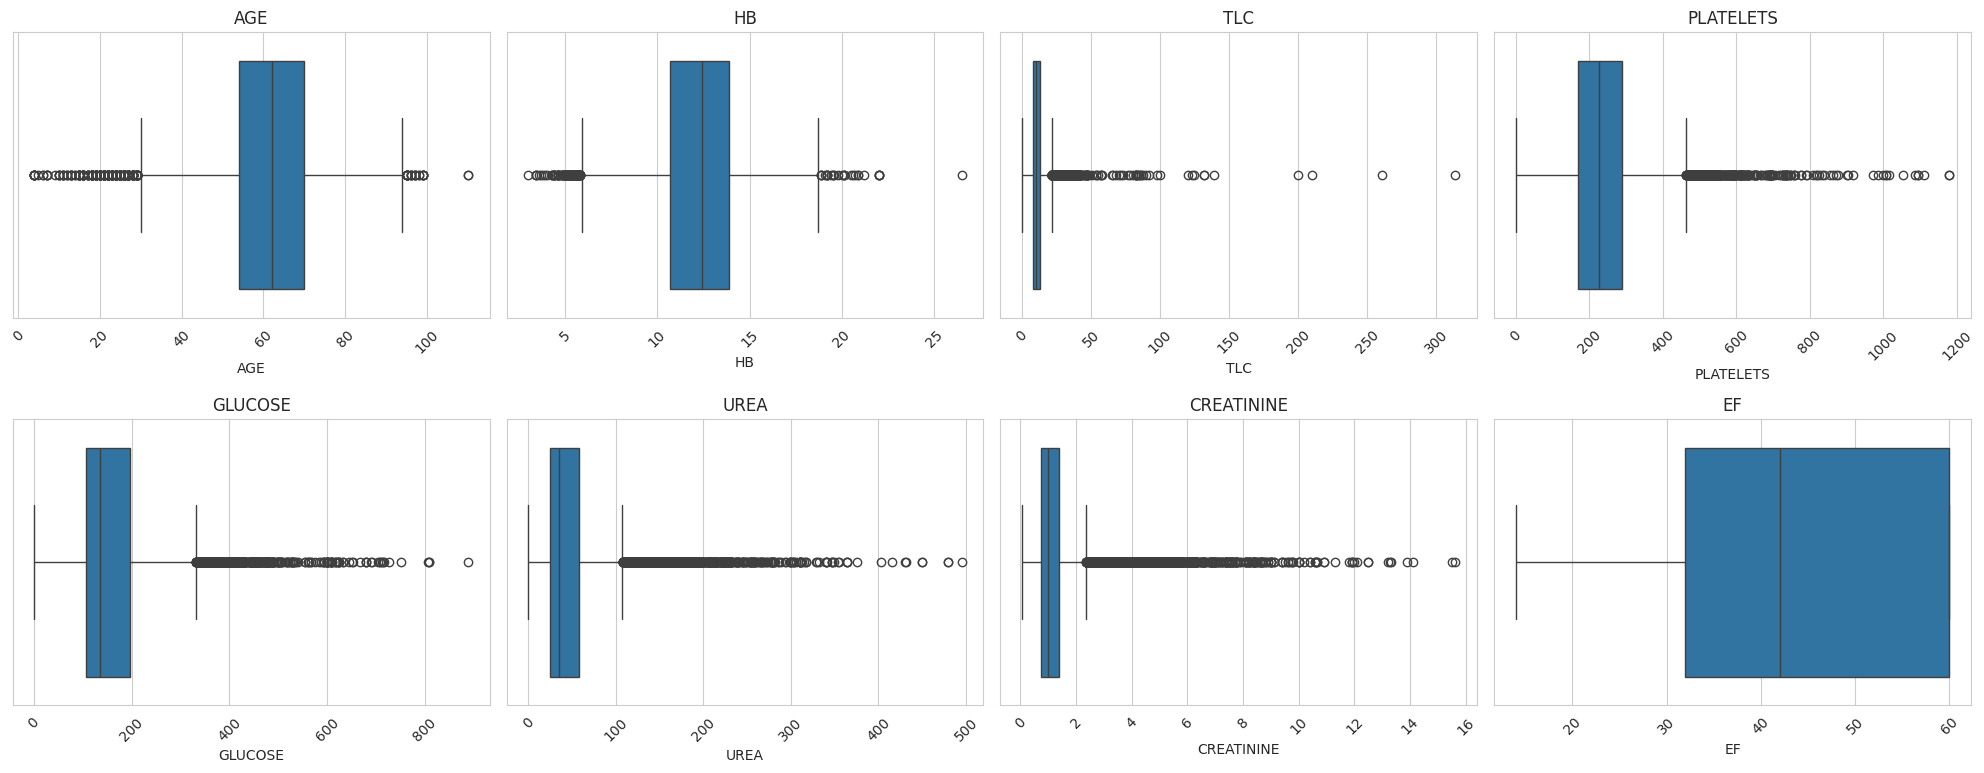

In [ ]:
import seaborn as sns

# Crear figura con 3 filas y 3 columnas
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df_numericas):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Eliminar ejes vacíos si hay menos gráficos que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

En las graficas anteriores se logra identificar que las variables numéricas representan una gran cantidad de valores atípicos. Teniendo en cuento esto, se decide calcular el porcentaje de datos atípicos que representa cada variable.

In [ ]:
outliers_list = []
for c in num_features:

    Q1 = df[c].quantile(0.25)
    Q3 = df[c].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask = (df[c] < lower) | (df[c] > upper)

    temp = (df.loc[mask, [c]]
              .rename(columns={c: 'value'})
              .assign(variable=c,
                      lower_bound=lower,
                      upper_bound=upper,
                      row_index=lambda x: x.index))

    outliers_list.append(temp)

outliers = pd.concat(outliers_list, ignore_index=True)
resumen = outliers.groupby("variable").size().reset_index(name="n_outliers")
print(resumen)

     variable  n_outliers
0         AGE         362
1  CREATININE        1644
2     GLUCOSE         716
3          HB         125
4   PLATELETS         469
5         TLC         759
6        UREA        1371


In [ ]:
resumen["pct_outliers"] = (resumen["n_outliers"] / len(df)) * 100
print(resumen)

     variable  n_outliers  pct_outliers
0         AGE         362      2.297392
1  CREATININE        1644     10.433458
2     GLUCOSE         716      4.544012
3          HB         125      0.793298
4   PLATELETS         469      2.976455
5         TLC         759      4.816907
6        UREA        1371      8.700895


In [ ]:
from scipy.stats import skew
asimetria_pandas = df_numericas.skew().sort_values(ascending=False)
print("Asimetría con pandas:")
print(asimetria_pandas)

# 3. Identificar variables con fuerte asimetría
altamente_asimetricas = asimetria_pandas[abs(asimetria_pandas) > 2]
print("\nVariables con |asimetría| > 2:")
print(altamente_asimetricas)


Asimetría con pandas:
TLC           12.423377
CREATININE     3.938348
UREA           2.912996
GLUCOSE        1.979241
PLATELETS      1.449952
EF            -0.055168
HB            -0.237822
AGE           -0.504050
dtype: float64

Variables con |asimetría| > 2:
TLC           12.423377
CREATININE     3.938348
UREA           2.912996
dtype: float64


In [ ]:
df_categoricas = df[cat_features]
df_categoricas.head()

GENDER  RURAL  TYPE OF ADMISSION-EMERGENCY/OPD  OUTCOME_DAMA  \
0       1      1                                1             0   
1       1      1                                1             0   
2       1      0                                1             0   
3       0      0                                1             0   
4       0      0                                1             0   

   OUTCOME_DISCHARGE  OUTCOME_EXPIRY  SMOKING  ALCOHOL  DM  HTN  ...  \
0                  1               0        0        0   1    0  ...   
1                  1               0        0        1   0    1  ...   
2                  1               0        0        0   1    0  ...   
3                  1               0        0        0   0    1  ...   
4                  1               0        0        0   0    1  ...   

   CONGENITAL  UTI  NEURO CARDIOGENIC SYNCOPE  ORTHOSTATIC  \
0           0    0                          0            0   
1           0    0                          0            0   
2           0    0                          0            0   
3           0    0                          0            0   
4           0    0                          0            0   

   INFECTIVE ENDOCARDITIS  DVT  CARDIOGENIC SHOCK  SHOCK  PULMONARY EMBOLISM  \
0                       0    0                  0      0                   0   
1                       0    0                  0      0                   0   
2                       0    0                  0      0                   0   
3                       0    0                  0      0                   0   
4                       0    0                  0      0                   0   

   CHEST INFECTION  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 42 columns]

# Análisis exploratorio de datos

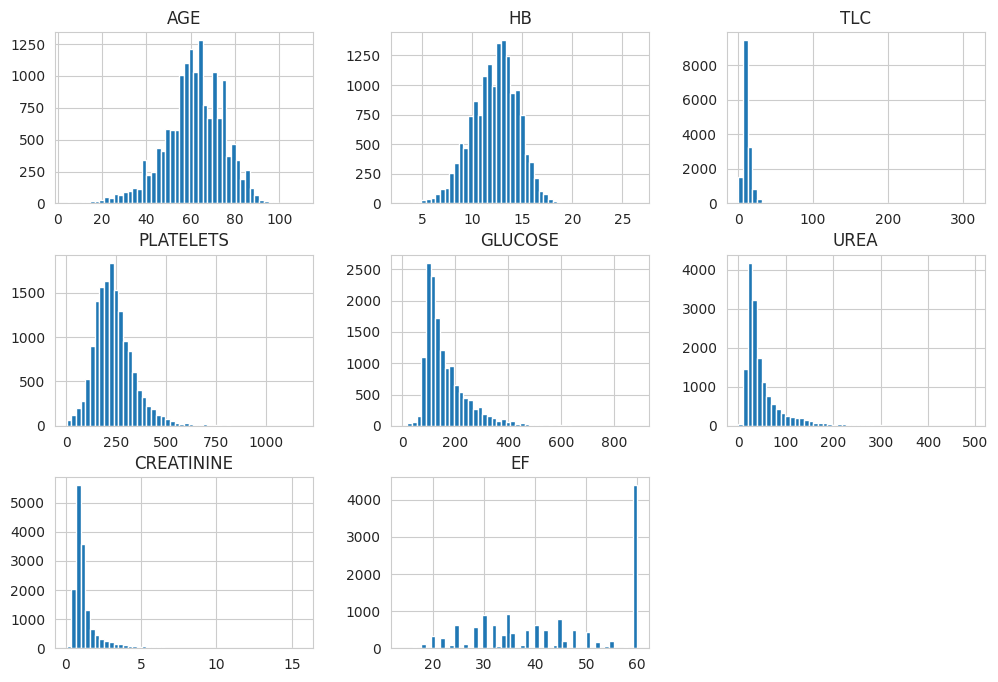

In [ ]:
# Histograma de variables numericas
var_hist = num_features
df[var_hist].hist(bins=50, figsize=(12, 8))
plt.show()

AGE (edad)

-  La variable AGE (edad) presenta una distribución aproximadamente normal con ligera asimetría hacia la derecha. La mayor parte de los registros se concentra entre los 50 y 70 años, lo que refleja que la población del dataset corresponde principalmente a adultos de mediana y mayor edad.

HB (hemoglobina)

-  La variable HB (hemoglobina) muestra una distribución bastante simétrica, con la mayor densidad de valores entre 12 y 14 g/dL. Los valores extremos por debajo de 8 g/dL o por encima de 18 g/dL son poco frecuentes, lo que indica que la mayoría de los registros se ubica en un rango considerado habitual.

TLC (total leucocyte count)

-  La variable TLC presenta una distribución altamente asimétrica a la derecha. La mayoría de los valores se concentra en rangos bajos, mientras que existe un número reducido de observaciones con valores muy elevados, que generan una cola larga en la distribución.

PLATELETS (plaquetas)

-  La variable PLATELETS tiene una distribución sesgada positivamente. La mayor concentración se encuentra entre 200,000 y 300,000, aunque se observan registros con valores más altos que extienden la cola de la distribución.

GLUCOSE (glucosa)

-  La variable GLUCOSE muestra una distribución asimétrica hacia la derecha, con un pico en los valores bajos y una dispersión amplia que incluye observaciones por encima de 400. Esto evidencia la presencia de valores extremos elevados en el dataset.

UREA

-  La variable UREA presenta una fuerte asimetría positiva. La mayoría de los valores se concentra por debajo de 100, aunque se registran observaciones con valores mucho más altos, que extienden la distribución hacia la derecha.

CREATININE (creatinina)

-  La variable CREATININE también exhibe una asimetría positiva pronunciada. La mayor parte de los registros se concentra en valores bajos, mientras que existen observaciones dispersas con valores más altos que alargan la cola de la distribución.

EF (ejection fraction)

-  La variable EF (fracción de eyección) muestra un patrón particular: existe una concentración importante de registros en el valor 60, mientras que el resto de la distribución se reparte entre valores de 20 a 40. Esto genera una distribución no simétrica con un pico muy marcado en el límite superior.

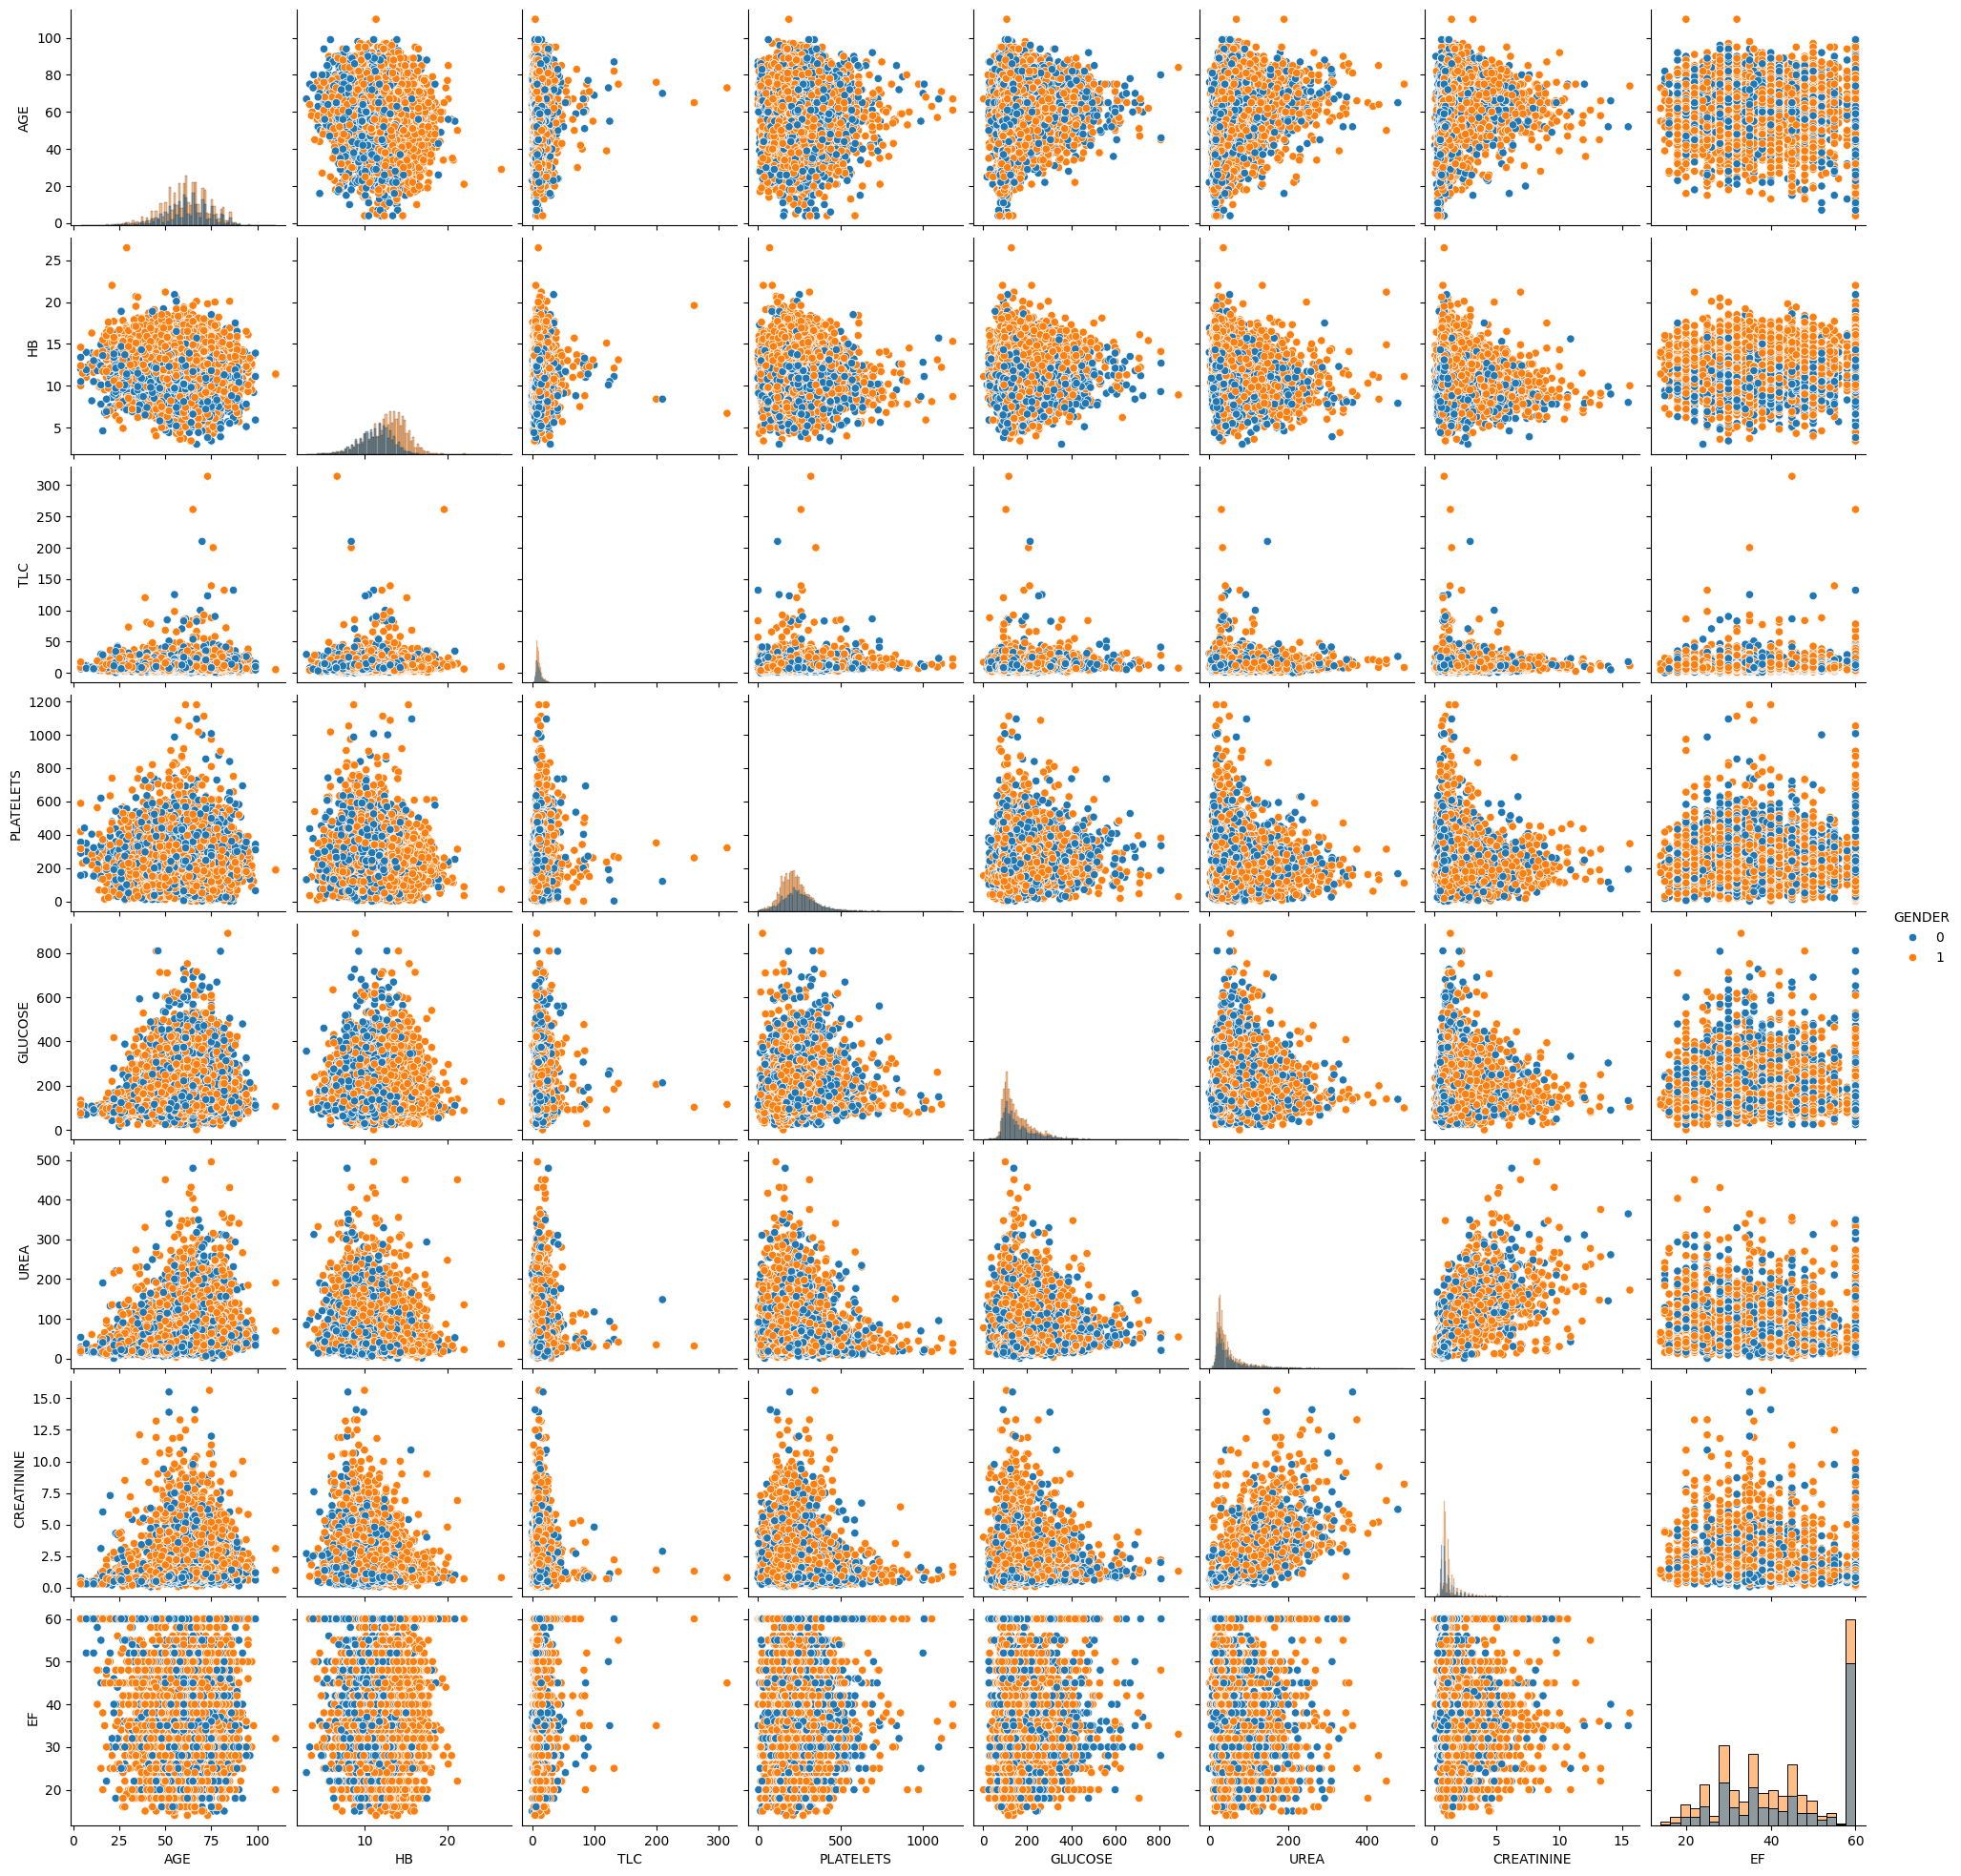

In [ ]:
sns.pairplot(df[num_features + ["GENDER"]], hue="GENDER", diag_kind="hist", height=2.5)
plt.show()

## Relaciones bivariadas

### Edad vs otras variables

-  No se observan tendencias lineales marcadas entre AGE y las demás variables.

-  Los puntos están bastante dispersos en ambos géneros.

### HB vs otras variables

-  Ligera correlación negativa con Urea y Creatinine (a medida que aumentan, la hemoglobina tiende a ser más baja).

-  Diferencia por género: los hombres concentran valores algo más altos de HB en todos los rangos.

### TLC vs otras variables

-  TLC presenta gran dispersión, con muchos valores extremos, pero no muestra relación clara con otras variables.

-  La distribución por género es muy similar.

### Plaquetas (PLATELETS)

-  No se aprecian correlaciones fuertes con otras variables.

-  La dispersión es amplia y comparable entre hombres y mujeres.

### Glucose vs Urea/Creatinine

-  No hay una correlación directa clara, aunque algunos casos con glucosa muy alta también muestran valores elevados de urea o creatinina.

-  Ambos géneros siguen el mismo patrón.

### Urea y Creatinine

-  Relación positiva clara: a mayor creatinina, mayor urea.

-  Ambos géneros siguen exactamente la misma tendencia.

### EF (fracción de eyección)

-  Se nota la concentración en el valor 60.

-  No hay una diferencia visible entre géneros en este patrón.

-  Relación inversa tenue con urea/creatinina: pacientes con valores altos de estos parámetros tienden a mostrar EF más baja.

### ¿Cuál sexo presenta mayor cantidad de hospitalizaciones?

/tmp/ipython-input-2681262874.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')


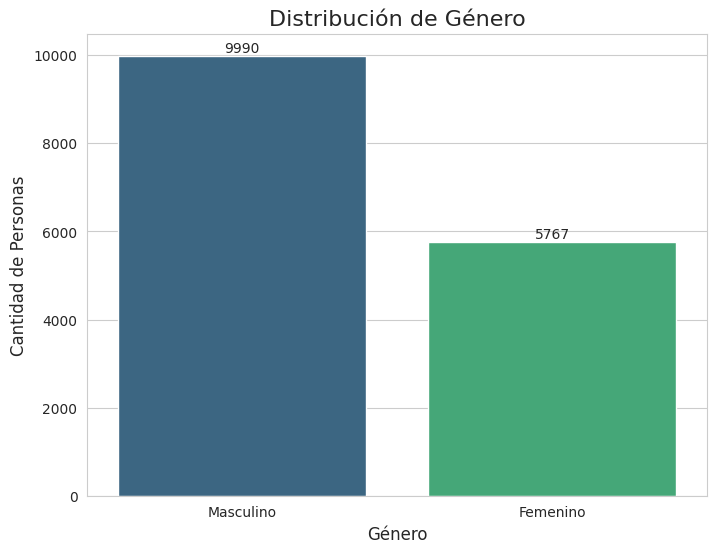

In [ ]:
import seaborn as sns

# Establece un estilo para el gráfico
sns.set_style("whitegrid")

# Obtiene los conteos y renombra el índice
gender_counts = df['GENDER'].value_counts().rename(index={1: 'Masculino', 0: 'Femenino'})

# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')

# Personaliza el gráfico
plt.title('Distribución de Género', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Cantidad de Personas', fontsize=12)
plt.xticks(rotation=0)

# Opcional: añade los valores encima de las barras
for i, value in enumerate(gender_counts.values):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

Con base en el gráfico anterior, es posible observar que la mayor cantidad de pacientes son de género masculino.

### ¿Cómo se ve afectada la cantidad de hospitalizaciones por la edad de los pacientes?

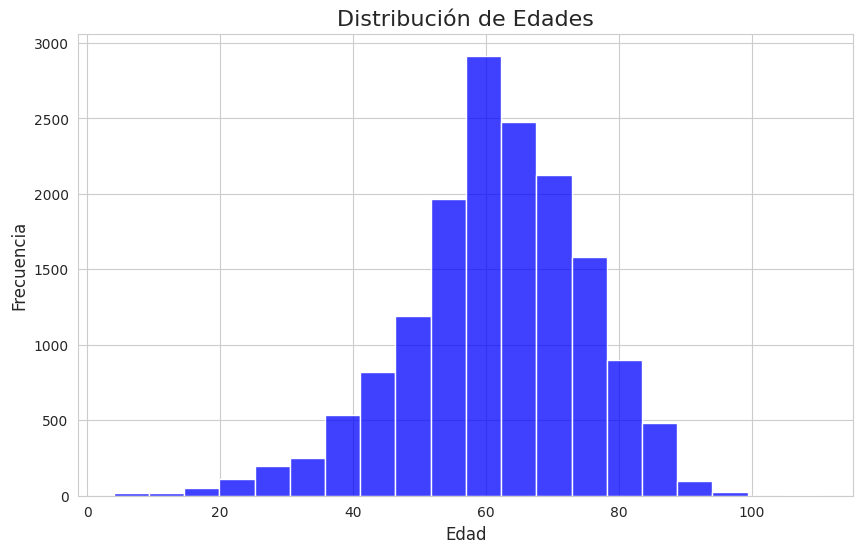

In [ ]:
# Establece el estilo para una mejor visualización
sns.set_style("whitegrid")

# Crea el histograma usando Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='AGE', bins=20, kde=False, color='blue')

# Personaliza el gráfico
plt.title('Distribución de Edades', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

La distribución de hospitalizaciones presenta un patrón claro y esperado.

Pico de hospitalizaciones: El rango de edad con mayor número de hospitalizaciones se encuentra entre los 55 y 63 años, seguido de cerca por el grupo de 63 a 68 años. Este hallazgo es coherente con el aumento de la prevalencia de enfermedades crónicas, como la hipertensión, la diabetes y las enfermedades cardiovasculares, a medida que las personas envejecen. Además, la acumulación de factores de riesgo a lo largo de la vida contribuye a una mayor necesidad de atención médica y hospitalización en esta etapa.

Asimetría negativa: El gráfico presenta asimetría negativa, lo que indica que, aunque hay hospitalizaciones en todas las edades, la mayor concentración de eventos ocurre en los grupos de mayor edad. La razón es que las personas mayores suelen tener sistemas inmunológicos más débiles y múltiples comorbilidades (varias enfermedades al mismo tiempo), lo que aumenta su vulnerabilidad a infecciones y complicaciones de salud.

Menor frecuencia de hospitalizaciones: El rango de edad con la menor cantidad de hospitalizaciones es el de 0 a 20 años. Esto se debe a que, en general, los niños y adultos jóvenes tienen un sistema inmune robusto y una menor incidencia de enfermedades crónicas graves. Las hospitalizaciones en este grupo suelen estar asociadas a accidentes, infecciones agudas o condiciones congénitas, que son menos frecuentes en comparación con las enfermedades degenerativas que afectan a la población de mayor edad.

En resumen, el gráfico refleja una clara correlación entre el envejecimiento y la probabilidad de ser hospitalizado debido a la acumulación de riesgos y el deterioro natural del cuerpo.

## ¿Existe relación entre la edad del paciente y la cantidad de días de hospitalización?

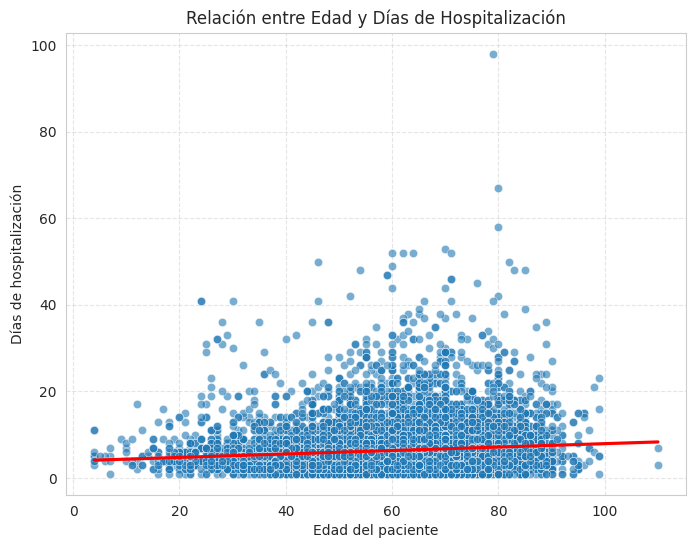

Correlación entre edad y días de hospitalización: 0.10646106421589754


In [ ]:
# Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="AGE", y="DURATION OF STAY", alpha=0.6)
sns.regplot(data=df, x="AGE", y="DURATION OF STAY", scatter=False, color="red")

plt.title("Relación entre Edad y Días de Hospitalización")
plt.xlabel("Edad del paciente")
plt.ylabel("Días de hospitalización")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

corr = df["AGE"].corr(df["DURATION OF STAY"])
print("Correlación entre edad y días de hospitalización:", corr)

El gráfico muestra una correlación de 0.1064 entre la edad y los días de permanencia en el hospital. Esto se interpreta como una correlación positiva, pero muy débil. Esto significa que, aunque a medida que la edad aumenta, los días de hospitalización también tienden a aumentar ligeramente, la relación no es lo suficientemente fuerte como para ser considerada significativa. La gran dispersión de los puntos en el gráfico, que no forman una línea clara, confirma esta débil relación. Los días de hospitalización de una persona no pueden predecirse con fiabilidad basándose únicamente en su edad, ya que otros factores —como la severidad de la enfermedad, la presencia de comorbilidades y el tipo de tratamiento— pueden tener un impacto mayor.

## 3. Dividir conjunto de entrenamiento y prueba

La variable elegida como objetivo es de tipo numérico continuo y representa el número de días, o fracción de días, que un paciente permanecerá en el hospital. Su predicción tiene un alto valor clínico y operativo, ya que permite planificar con mayor precisión los recursos, la disponibilidad de camas y la asignación de personal. Además, esta duración está influenciada por múltiples factores presentes en el conjunto de datos, como diagnósticos, comorbilidades y resultados de laboratorio.

In [ ]:
# Separar variables y objetivo
#X = pd.concat([df[cat_features], df_numericas_log], axis=1) # variables
X = df[num_features+cat_features]
y = df['DURATION OF STAY']  # objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.2 Preprocesamiento

In [ ]:
from sklearn.preprocessing import RobustScaler

# Transformador para numéricas
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", RobustScaler())
])

# Transformador para categóricas
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent"))
])

# Combinamos en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ]
)

# Aplicamos el preprocesamiento
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## 4. Seleccion de características

### PCA Y MCA

In [ ]:
# 1. Obtener índices de columnas numéricas en el dataset crudo
num_indices = [i for i, col in enumerate(X_train.columns) if col in num_features]

# 2. Filtrar las columnas procesadas usando esos índices
X_train_numericas = pd.DataFrame(
    X_train_processed[:, num_indices],
    columns=num_features
)

X_test_numericas = pd.DataFrame(
    X_test_processed[:, num_indices],
    columns=num_features
)

# PCA (elige % de var. explicada automáticamente)
pca = PCA(n_components=0.90, random_state=42)
Xn_train_pca = pca.fit_transform(X_train_numericas)
Xn_test_pca  = pca.transform(X_test_numericas)

pca_names = [f'PCA{i+1}' for i in range(Xn_train_pca.shape[1])]
Xn_train_pca = pd.DataFrame(Xn_train_pca, columns=pca_names, index=X_train.index)
Xn_test_pca  = pd.DataFrame(Xn_test_pca,  columns=pca_names, index=X_test.index)

print(f'PCA: {len(pca_names)} componentes, var. explicada acumulada = {pca.explained_variance_ratio_.sum():.3f}')

PCA: 6 componentes, var. explicada acumulada = 0.940


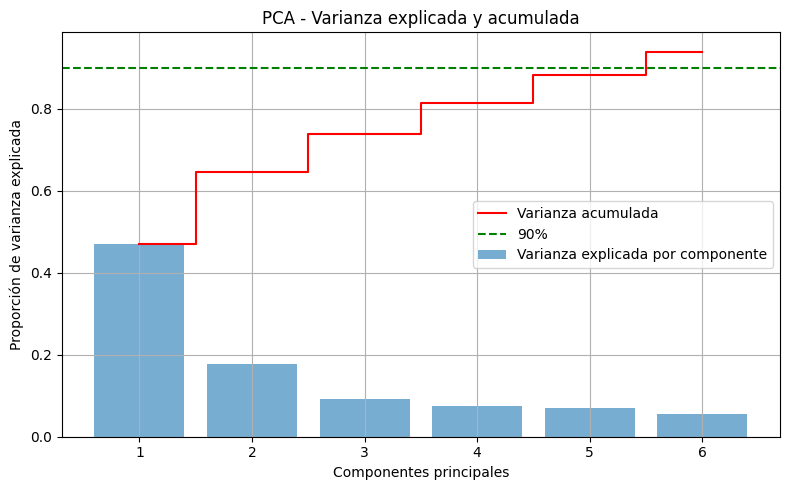

In [ ]:
# Varianza explicada por cada componente
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8,5))

# Barras de varianza explicada individual
plt.bar(range(1, len(var_exp)+1), var_exp, alpha=0.6, label='Varianza explicada por componente')

# Línea de varianza acumulada
plt.step(range(1, len(cum_var_exp)+1), cum_var_exp, where='mid', color='red', label='Varianza acumulada')

# Línea horizontal del 70% (opcional, ya que usaste 0.70)
plt.axhline(y=0.9, color='green', linestyle='--', label='90%')

plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('PCA - Varianza explicada y acumulada')
plt.xticks(range(1, len(var_exp)+1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En este gráfico se observa que para las variables numéricas solamente se logran construir tres componentes principales, las cuales alcanzan a explicar un 74% de la varianza total de las variables, siendo la primera de ellas la que más porcentaje de varianza explica con un 47% de varianza aproximadamente.

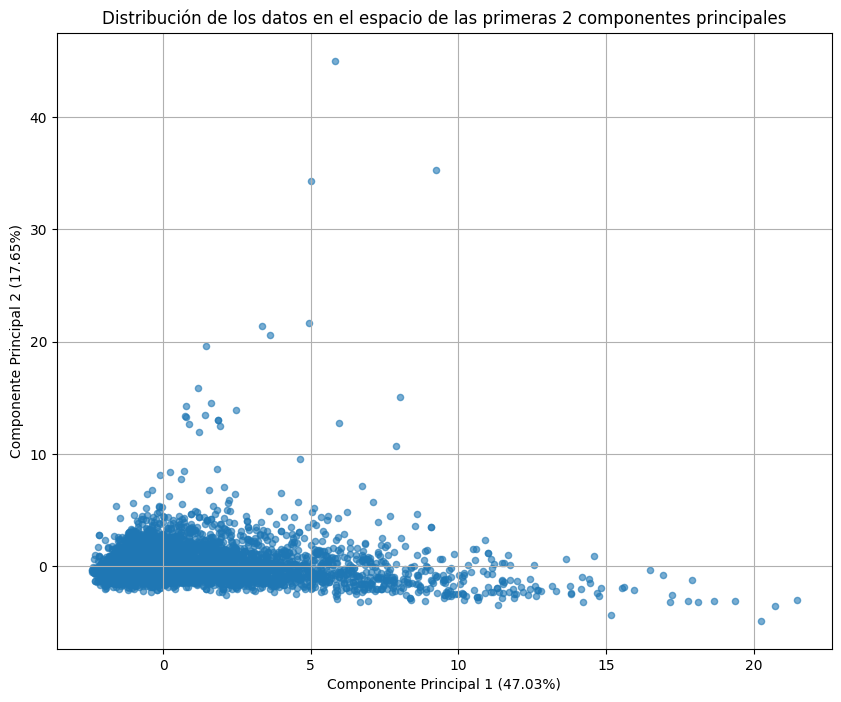

In [ ]:
# Obtener las primeras dos componentes para el gráfico
pc1 = Xn_train_pca.iloc[:, 0]
pc2 = Xn_train_pca.iloc[:, 1]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(pc1, pc2, alpha=0.6, s=20) # 'alpha' controla la transparencia y 's' el tamaño del punto
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)')
plt.title('Distribución de los datos en el espacio de las primeras 2 componentes principales')
plt.grid(True)
plt.show()

Es posible observar que la primera componente explica un 43.31% de la varianza, mientras que la segunda componente explica un 16.28% de esta. También, la agrupación de puntos cerca del punto (0,0) indica que la mayoría de datos tienen valores bajos en ambas componentes, por otro lado, aquellos puntos que se alejan del origen, pueden representar valores atípicos y que son muy diferentes al resto de las observaciones. Finalmente, se evidencia que hay una mayor dispersión de los puntos en la componente 1 que en la componente 2, lo que podría indicar que hay una gran variación en las variables que contribuyen a la componente 1, mientras que la variación en la segunda componente es menor.

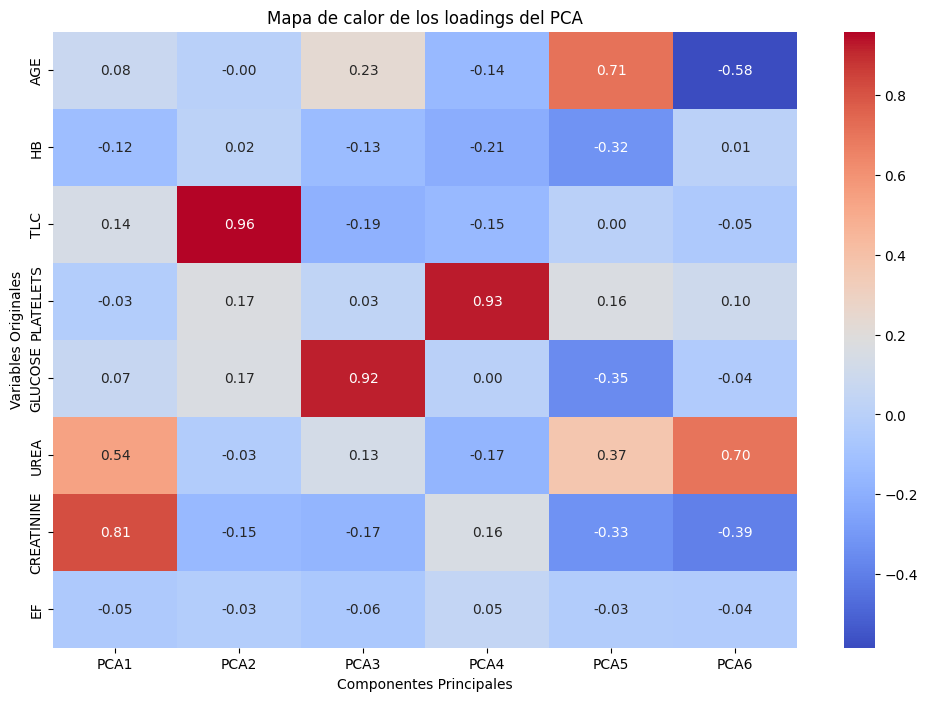

In [ ]:
import seaborn as sns
# Crear un DataFrame con los loadings
loadings = pd.DataFrame(pca.components_, columns=num_features, index=pca_names)

plt.figure(figsize=(12, 8))
sns.heatmap(loadings.T, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Mapa de calor de los loadings del PCA')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables Originales', )
plt.show()

PCA1: Esta componente está fuertemente influenciada por CREATININE (0.81) y UREA (0.54). Ambas son marcadores importantes de la función renal. Por lo tanto, podemos interpretar a la PCA1 como una componente relacionada con la función renal.

PCA2: La variable que domina esta componente es TLC (0.96), que es el recuento total de leucocitos. Por lo tanto, la PCA2 probablemente representa información relacionada con la respuesta inmune o el estado infeccioso del paciente.

PCA3: Esta componente tiene una fuerte correlación positiva con GLUCOSE (0.92). Esto sugiere que la PCA3 está relacionada con los niveles de glucosa del paciente. También hay una contribución moderada de AGE (0.23).

In [ ]:
# 1. Obtener índices de las columnas categóricas en el X_train original
cat_indices = [i for i, col in enumerate(X_train.columns) if col in cat_features]

# 2. Filtrar las columnas categóricas procesadas
X_train_categoricas = pd.DataFrame(
    X_train_processed[:, cat_indices],
    columns=cat_features
)

X_test_categoricas = pd.DataFrame(
    X_test_processed[:, cat_indices],
    columns=cat_features
)

# 3. MCA con prince
import prince

mca = prince.MCA(
    n_components=10,
    n_iter=5,
    random_state=42
)
mca.fit(X_train_categoricas)

Xc_train_mca = mca.transform(X_train_categoricas)
Xc_test_mca  = mca.transform(X_test_categoricas)
Xc_train_mca.index = X_train.index
Xc_test_mca.index  = X_test.index

# 4. Renombrar componentes
mca_names = [f'MCA{i+1}' for i in range(Xc_train_mca.shape[1])]
Xc_train_mca.columns = mca_names
Xc_test_mca.columns  = mca_names

# 5. Porcentaje de varianza (inercia)
ev = mca.eigenvalues_summary
print('MCA inercia por eje:', ev['% of variance'].values)

MCA inercia por eje: ['8.02%' '4.91%' '4.82%' '3.96%' '3.57%' '3.52%' '3.24%' '2.92%' '2.79%'
 '2.68%']


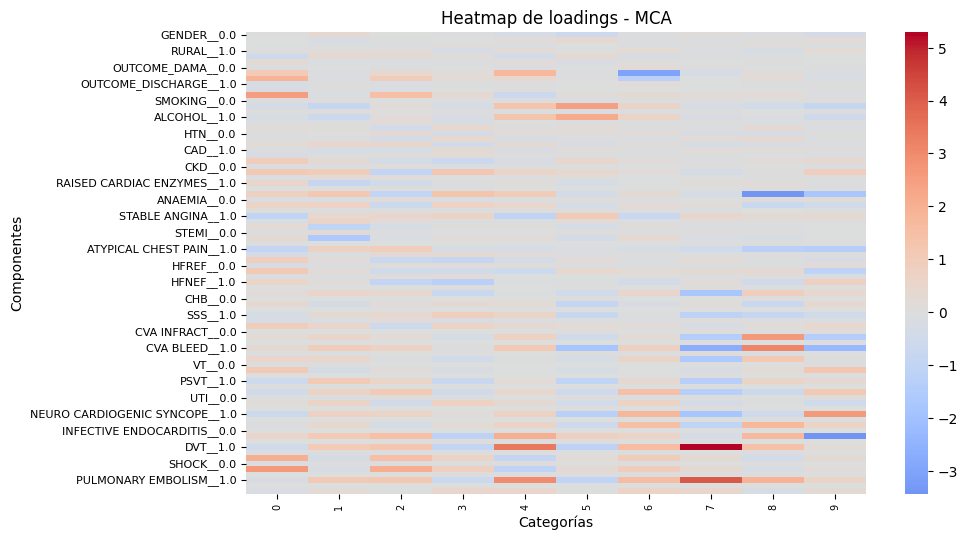

In [ ]:
# Coordenadas de las categorías en los ejes principales
coords = mca.column_coordinates(X_train_categoricas)

# Normalizar nombres (para saber qué categoría pertenece a qué variable)
coords.index = coords.index.astype(str)

# Heatmap de loadings (categorías vs componentes)
plt.figure(figsize=(10,6))
threshold = 0.2  # ejemplo
filtered_data = coords.loc[:, coords.abs().max() > threshold]
sns.heatmap(filtered_data, cmap="coolwarm", center=0)
plt.title("Heatmap de loadings - MCA")
plt.xlabel("Categorías")
plt.ylabel("Componentes")
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=8)
plt.show()

Dimensión 1 (Componente 0): Esta dimensión está fuertemente definida por OUTCOME_DAMA_1.0 (valor alto, rojo) y SHOCK_0 (valor alto, rojo), lo que sugiere que esta dimensión podría estar relacionada con el desenlace del paciente. Por otro lado, OUTCOME_DISCHARGE_1.0, DVT_1.0 y PULMONARY EMBOLISM_1.0 tienen contribuciones negativas (azules).

Dimensión 2 (Componente 1): Esta componente está fuertemente influenciada por ALCOHOL_1.0, HTN_1.0, CAD_1.0, y CKD_0.0, lo que podría indicar una dimensión relacionada con factores de riesgo y comorbilidades preexistentes.

Dimensión 3 (Componente 2): Esta dimensión parece estar relacionada con afecciones más graves o agudas, ya que STEMI_1.0 y INFECTION_ENDOCARDITIS_0.0 tienen contribuciones positivas (rojas), mientras que CVA_INFARCT_1.0 contribuye de manera negativa (azul).

Dimensión 4 y 5 (Componentes 3 y 4): A partir de la Dimensión 4, las contribuciones se vuelven más difusas. Sin embargo, en la Dimensión 5, se observa una fuerte contribución de INFECTIVE_ENDOCARDITIS_1.0 y PULMONARY_EMBOLISM_1.0.

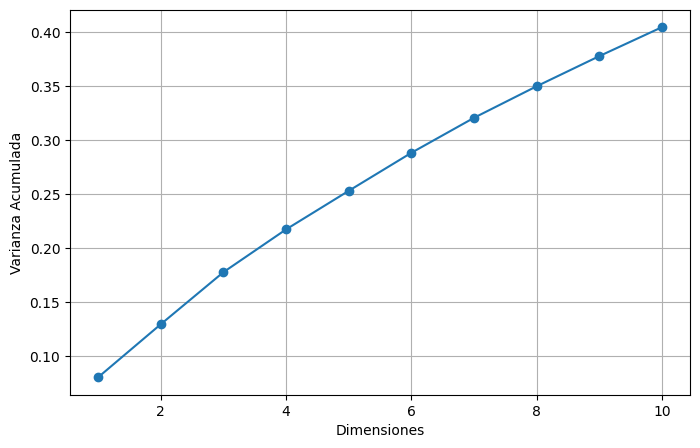

In [ ]:
# Convertir a numérico, quitando símbolos si es necesario
ev['% of variance'] = ev['% of variance'].replace('%', '', regex=True)  # elimina el símbolo %
ev['% of variance'] = ev['% of variance'].str.replace(',', '.', regex=False)  # cambia coma por punto
ev['% of variance'] = pd.to_numeric(ev['% of variance'], errors='coerce')

# Ahora sí, en proporción
var_exp_mca = ev['% of variance'].values / 100
cum_var_exp_mca = np.cumsum(var_exp_mca)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(var_exp_mca) + 1), cum_var_exp_mca, marker='o')
plt.xlabel('Dimensiones')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.show()

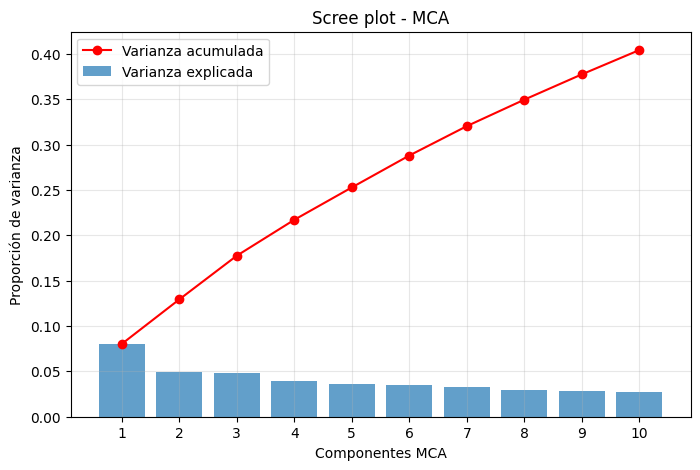

In [ ]:
# Asegurar que los valores sean numéricos
ev['% of variance'] = pd.to_numeric(ev['% of variance'], errors='coerce')

# Varianza explicada en proporción y acumulada
var_exp_mca = ev['% of variance'].values / 100
cum_var_exp_mca = np.cumsum(var_exp_mca)
componentes = np.arange(1, len(var_exp_mca) + 1)

# Gráfica
plt.figure(figsize=(8, 5))

# Barras: varianza explicada individual
plt.bar(componentes, var_exp_mca, alpha=0.7, label='Varianza explicada')

# Línea: varianza acumulada
plt.plot(componentes, cum_var_exp_mca, marker='o', color='red', label='Varianza acumulada')

# Formato
plt.xticks(componentes)
plt.xlabel('Componentes MCA')
plt.ylabel('Proporción de varianza')
plt.title('Scree plot - MCA')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

En contraste, el Análisis de Correspondencias Múltiples (MCA), aplicado a las variables categóricas, no logró una reducción de dimensionalidad significativa, ya que las cinco primeras componentes solo explicaron el 25% de la varianza. Esto sugiere que las relaciones entre las categorías son complejas y difusas, lo cual es una información valiosa por sí misma sobre la estructura de los datos.

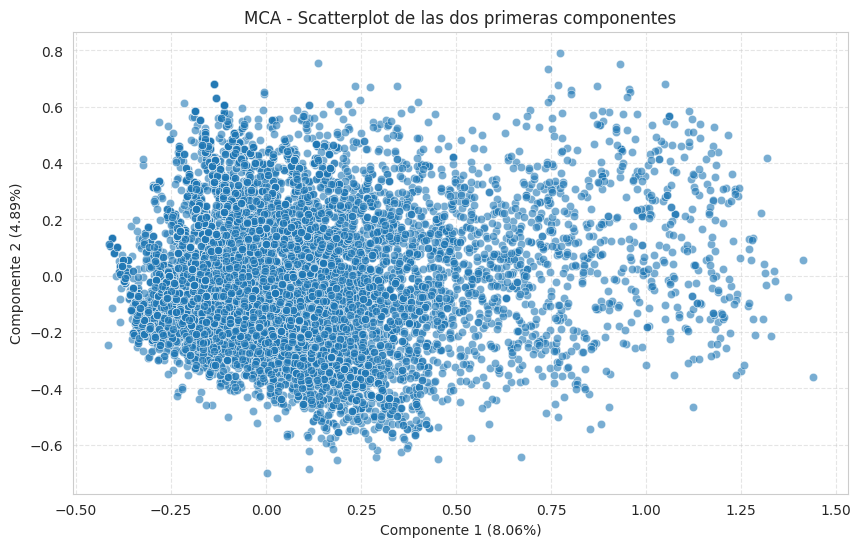

In [ ]:
# Supongamos que tu MCA ya está ajustado
mca = prince.MCA(n_components=2, random_state=42)

mca = mca.fit(df_categoricas)

# Coordenadas de las filas
row_coords = mca.row_coordinates(df_categoricas)

# Gráfico de dispersión
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=row_coords[0],
    y=row_coords[1],
    alpha=0.6
)

# Use the eigenvalues_ attribute to get the explained variance ratio
explained_variance_ratio = mca.eigenvalues_

plt.xlabel(f"Componente 1 ({explained_variance_ratio[0]*100:.2f}%)")
plt.ylabel(f"Componente 2 ({explained_variance_ratio[1]*100:.2f}%)")
plt.title("MCA - Scatterplot de las dos primeras componentes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


El scatterplot de las dos primeras componentes principales del Análisis de Correspondencia Múltiple (MCA) muestra que las variables categóricas se han transformado en un nuevo espacio de dos dimensiones. Sin embargo, la varianza explicada por estas dos componentes es bastante baja, con la Componente 1 explicando el 8.06% de la varianza total y la Componente 2 el 4.89%. Esta baja inercia total explicada indica que estas dos dimensiones por sí solas no capturan una parte significativa de la información contenida en las variables categóricas originales. Además, la distribución de los puntos en el gráfico no revela una estructura de grupos o clústeres distintiva, lo que sugiere que no hay divisiones claras en el conjunto de datos a lo largo de estas dos primeras dimensiones.

In [ ]:
X_train_reduced = pd.concat([Xn_train_pca, Xc_train_mca], axis=1)
X_test_reduced  = pd.concat([Xn_test_pca,  Xc_test_mca],  axis=1)

print('Shape train reducido:', X_train_reduced.shape)
print('Shape test  reducido:', X_test_reduced.shape)

Shape train reducido: (11029, 16)
Shape test  reducido: (4728, 16)


In [ ]:
X_train_reduced = pd.concat(
    [Xn_train_pca.reset_index(drop=True),
     Xc_train_mca.reset_index(drop=True)],
    axis=1
)
X_train_reduced.head(10)

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      MCA1  \
0  0.032388 -0.381448  1.862615 -0.169339  1.480222 -0.143519 -0.028523   
1 -0.908495 -0.690935 -0.511670 -0.045472 -0.858212 -0.263620 -0.351038   
2 -0.662312  0.986016 -0.524048 -0.168559 -0.503106  0.216354 -0.146670   
3 -1.403588  0.016854  0.417409  1.383160  0.985457 -0.759566 -0.135885   
4 -1.191762 -0.029616  0.811850 -0.420920 -0.217346 -0.623054 -0.090353   
5 -0.561789 -0.451430  0.340292  0.457830  1.343584 -0.713363  0.134211   
6 -0.690520  1.319913 -0.539057 -0.731378  0.157035  0.084166 -0.108268   
7 -0.828700 -0.846656 -0.699445 -0.702287  0.295181 -0.191115 -0.311392   
8 -1.215490  0.604735 -0.454173  1.457777  0.851980 -0.078110 -0.273313   
9  0.825273 -0.509801 -1.016535 -1.856823  1.213350  2.403990 -0.007074   

       MCA2      MCA3      MCA4      MCA5      MCA6      MCA7      MCA8  \
0  0.139660 -0.101355 -0.226230 -0.174019 -0.047855  0.035411 -0.058558   
1  0.079104  0.183120  0.062337 -0.226115  0.228431 -0.165709  0.066923   
2  0.151174  0.092428 -0.110833 -0.086147  0.105596 -0.031464 -0.013924   
3  0.065651 -0.066173  0.160561  0.007652 -0.044096 -0.005046  0.058450   
4 -0.242636 -0.092536  0.062220 -0.018035 -0.190267  0.000842  0.017054   
5  0.048072  0.303609 -0.032190  0.385771 -0.005514 -0.542198 -0.111096   
6  0.275487  0.136742 -0.218971 -0.082642 -0.050635  0.069750 -0.303890   
7 -0.028768  0.052122  0.163070 -0.263001  0.173629 -0.192836  0.135157   
8  0.282821  0.267077 -0.192860 -0.032033 -0.220101  0.009638 -0.218505   
9 -0.077944 -0.140797 -0.172543 -0.015576  0.408971  0.071150  0.098103   

       MCA9     MCA10  
0  0.201837 -0.138244  
1  0.002602  0.106567  
2  0.029784  0.090903  
3 -0.066193 -0.037933  
4  0.032243 -0.078599  
5  0.011532 -0.004662  
6  0.108450  0.049327  
7  0.120915  0.088185  
8 -0.015262 -0.003926  
9  0.053204 -0.321356

In [ ]:
X_train_reduced.shape

(11029, 16)

In [ ]:
# ============================
# 4) PRE-PRUNING con RandomizedSearchCV (solo TRAIN)
# ============================
import numpy as np # Import numpy
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

pipe_pre = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=42))
])

param_dist_pre = {
    'model__max_depth': np.arange(2, 20),
    'model__min_samples_split': np.arange(10, 50),
    'model__min_samples_leaf': np.arange(5, 20),
    'model__max_features': [None, 'sqrt', 'log2']
}

search_pre = RandomizedSearchCV(
    estimator=pipe_pre,
    param_distributions=param_dist_pre,
    n_iter=60,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    refit=True
)

search_pre.fit(X_train_reduced, y_train)


print("\n=== PRE-PRUNING ===")
print("Mejores hiperparámetros:", search_pre.best_params_)
print(f"Mejor RMSE CV: {-search_pre.best_score_:.4f}")

# Evaluación final en test (primera vez que tocamos test para pre-pruning)
y_pred_pre = search_pre.predict(X_test_reduced)
rmse_test_pre = np.sqrt(mean_squared_error(y_test, y_pred_pre))
r2_test_pre = r2_score(y_test, y_pred_pre)
rmse_rel_test_pre = rmse_test_pre / y_test.mean()

print(f'🔎 RMSE: {rmse_test_pre:.3f}')
print(f'🔎 R²: {r2_test_pre:.3f}')
print(f'🔎 RMSE relativo (test): {rmse_rel_test_pre:.3f}')


=== PRE-PRUNING ===
Mejores hiperparámetros: {'model__min_samples_split': np.int64(29), 'model__min_samples_leaf': np.int64(7), 'model__max_features': None, 'model__max_depth': np.int64(3)}
Mejor RMSE CV: 4.7832
🔎 RMSE: 4.689
🔎 R²: 0.104
🔎 RMSE relativo (test): 0.737


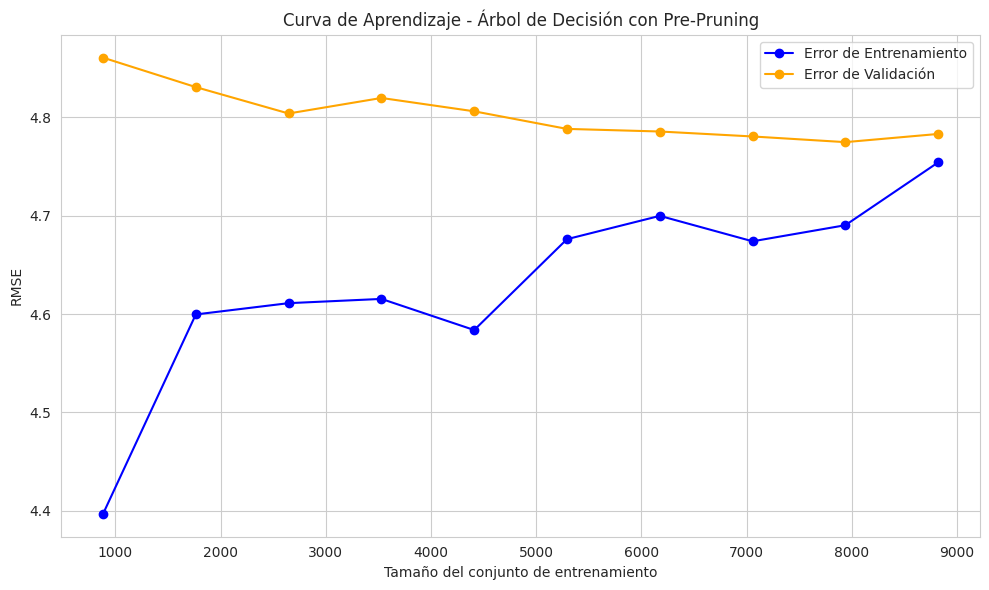

In [ ]:

from sklearn.model_selection import learning_curve
# ============================
# 4. Curva de aprendizaje
# ============================
train_sizes, train_scores, val_scores = learning_curve(
    estimator=search_pre.best_estimator_,   # usa el mejor modelo del RandomizedSearchCV
    X=X_train_reduced,
    y=y_train,
    cv=5,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), # 10 tamaños distintos de train
    random_state=42
)

# Como sklearn devuelve negativos para errores (porque maximiza), invertimos el signo
train_rmse = -np.mean(train_scores, axis=1)
val_rmse = -np.mean(val_scores, axis=1)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Error de Validación')

plt.title('Curva de Aprendizaje - Árbol de Decisión con Pre-Pruning')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones

El proceso de pre-pruning se aplicó con el objetivo de optimizar el modelo de árbol de decisión antes de su entrenamiento completo, evitando la creación de un árbol excesivamente complejo. La búsqueda de los mejores hiperparámetros identificó una configuración óptima que utiliza una profundidad máxima de 3 y requiere que cada hoja contenga al menos 7 muestras.

Sin embargo, el análisis de la curva de aprendizaje reveló que el modelo tiene un claro sobreajuste.  El error de entrenamiento (cercano a 0) es significativamente más bajo que el error de validación (alrededor de 4.75), una brecha que no se reduce a medida que aumenta el tamaño del conjunto de entrenamiento.

A pesar de que el RMSE en el conjunto de prueba (4.6892) es consistente con el RMSE de validación cruzada (4.7832), la gran diferencia con el error de entrenamiento indica que el modelo no está generalizando bien. Las restricciones aplicadas por el pre-pruning no fueron suficientes para mitigar por completo el sobreajuste. Para mejorar el rendimiento, sería necesario explorar otras estrategias de regularización o hiperparámetros, o considerar un modelo más robusto, como Random Forest.

In [ ]:
# ============================
# 5) POST-PRUNING (árbol grande -> path alphas -> CV en TRAIN)
# ============================
#import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# === 0) Cast a float32 si aplica (acelera y reduce memoria)
X_train_np = np.asarray(X_train_reduced, dtype=np.float32)
y_train_np = np.asarray(y_train)  # target puede quedar en float64
X_test_np  = np.asarray(X_test_reduced,  dtype=np.float32)
y_test_np  = np.asarray(y_test)

# === 1) Ruta de poda en un SUBSET
rng = np.random.RandomState(42)
n_sub = min(len(X_train_np), 15000)
idx = rng.choice(len(X_train_np), n_sub, replace=False)

tree_full_sub = DecisionTreeRegressor(random_state=42)
tree_full_sub.fit(X_train_np[idx], y_train_np[idx])

path = tree_full_sub.cost_complexity_pruning_path(X_train_np[idx], y_train_np[idx])
alphas_full = np.unique(np.round(path.ccp_alphas, 10))

# === 2) Muestrea ~40 alphas representativos (cuantiles)
if len(alphas_full) > 40:
    quantiles = np.linspace(0, 1, 40)
    ccp_alphas = np.quantile(alphas_full, quantiles)
else:
    ccp_alphas = alphas_full

# === 3) CV paralela y árbol con límites de complejidad (más rápido)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

def cv_rmse_for_alpha(a):
    model = DecisionTreeRegressor(
        random_state=42,
        ccp_alpha=a,
        max_depth=6,
        min_samples_leaf=11
    )
    scores = cross_val_score(
        model, X_train_np, y_train_np,
        scoring='neg_root_mean_squared_error',
        cv=kf, n_jobs=-1
    )
    return float((-scores).mean())

rmse_list = [cv_rmse_for_alpha(a) for a in ccp_alphas]
best_idx   = int(np.argmin(rmse_list))
best_alpha = float(ccp_alphas[best_idx])

print("\n=== POST-PRUNING ===")
print(f"Mejor ccp_alpha: {best_alpha:.6f} | RMSE CV={rmse_list[best_idx]:.4f}")

# === 4) Entrena SOLO el árbol final y, si quieres, mide tamaño una vez
tree_pruned = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha,
    max_depth=20,
    min_samples_leaf=5
)
tree_pruned.fit(X_train_np, y_train_np)

n_leaves = tree_pruned.get_n_leaves()
n_nodes  = tree_pruned.tree_.node_count
print(f"Hojas: {n_leaves} | Nodos: {n_nodes}")


=== POST-PRUNING ===
Mejor ccp_alpha: 0.034431 | RMSE CV=4.8177
Hojas: 70 | Nodos: 139


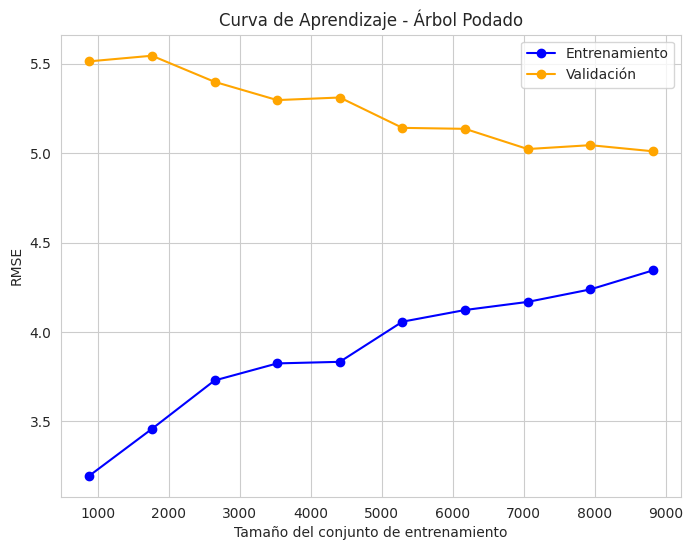

In [ ]:
# --- Curva de Aprendizaje con el árbol podado ---
train_sizes, train_scores, val_scores = learning_curve(
    tree_pruned,                     # tu árbol ya podado
    X_train_np, y_train_np,
    train_sizes=np.linspace(0.1, 1.0, 10),  # desde 10% hasta 100% de los datos
    cv=5,                             # 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertir MSE negativo a RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse   = np.sqrt(-val_scores.mean(axis=1))

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Validación')

plt.title('Curva de Aprendizaje - Árbol Podado')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
y_pred_post = tree_pruned.predict(X_test_np)
rmse_test_post = np.sqrt(mean_squared_error(y_test_np, y_pred_post))
r2_test_post = r2_score(y_test_np, y_pred_post)
rmse_rel_test_post = rmse_test_post / y_test_np.mean()

print('\n=== Evaluación Final POST-PRUNING ===')
print(f'🔎 RMSE: {rmse_test_post:.3f}')
print(f'🔎 R²: {r2_test_post:.3f}')
print(f'🔎 RMSE relativo (test): {rmse_rel_test_post:.3f}')


=== Evaluación Final POST-PRUNING ===
🔎 RMSE: 4.821
🔎 R²: 0.053
🔎 RMSE relativo (test): 0.758


El modelo logró encontrar el ccp_alpha óptimo de 0.034431, lo que resultó en un árbol con 70 hojas y 139 nodos, un tamaño significativamente menor que un árbol sin podar. El RMSE de validación cruzada fue de 4.821. Aunque este valor es similar al de otros modelos, el gráfico de la curva de aprendizaje revela la verdadera naturaleza de su bajo rendimiento.
La curva de aprendizaje para el árbol podado muestra una gran diferencia entre el error de entrenamiento y el error de validación. El error de entrenamiento comienza bajo pero aumenta a medida que se agregan más datos, mientras que el error de validación comienza alto y se estabiliza. Las dos curvas nunca convergen, lo que es un claro signo de subajuste, ya que el modelo no puede aprender adecuadamente las relaciones en los datos, incluso con un conjunto de entrenamiento más grande.

=== KNN - Mejores HP ===
Mejores hiperparámetros: {'knn__algorithm': 'kd_tree', 'knn__metric': 'minkowski', 'knn__n_neighbors': 49, 'knn__p': 1, 'knn__weights': 'distance'}
Mejor RMSE CV: 4.5166
🔎 RMSE: 4.415
🔎 R²: 0.206
🔎 RMSE relativo (test): 0.694


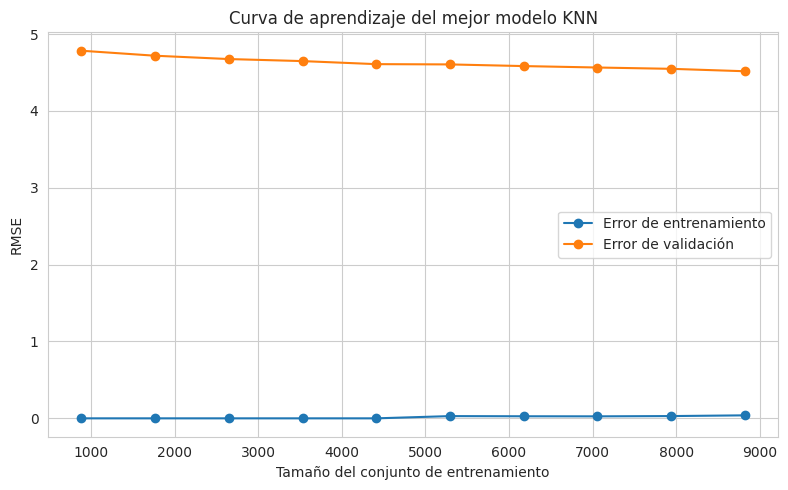

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
import numpy as np
import matplotlib.pyplot as plt

pipe_knn = Pipeline(steps=[
    ("knn", KNeighborsRegressor())
])
param_grid = {
    "knn__n_neighbors": list(range(1, 50)),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["minkowski"],
    "knn__p": [1, 2],
    "knn__algorithm": ['brute', 'kd_tree', 'ball_tree']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_knn, param_grid, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
gs.fit(X_train_reduced, y_train)

# Obtener el mejor modelo ya optimizado
best_knn_model = gs.best_estimator_

# Imprimir los resultados del mejor modelo
print("=== KNN - Mejores HP ===")
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor RMSE CV: {-gs.best_score_:.4f}")

# Evaluación final en el conjunto de prueba
y_pred_test = best_knn_model.predict(X_test_reduced)
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test_knn = r2_score(y_test, y_pred_test)
rmse_rel_test_knn = rmse_test_knn / y_test.mean()

print(f'🔎 RMSE: {rmse_test_knn:.3f}')
print(f'🔎 R²: {r2_test_knn:.3f}')
print(f'🔎 RMSE relativo (test): {rmse_rel_test_knn:.3f}')


# --- Curva de Aprendizaje del mejor modelo ---
train_sizes, train_scores, val_scores = learning_curve(
    best_knn_model, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

train_rmse = -train_scores.mean(axis=1)
val_rmse = -val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Error de validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje del mejor modelo KNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones

El mejor modelo KNN, aunque ha sido optimizado con RandomizedSearchCV, sigue mostrando un comportamiento de sobreajuste significativo. La capacidad del modelo para memorizar los datos de entrenamiento contrasta fuertemente con su rendimiento en datos no vistos. Esto sugiere que:

*   Aún hay complejidad excesiva: A pesar de tener 49 vecinos, el modelo sigue siendo demasiado "detallista" para los datos disponibles.

*   Los datos pueden ser ruidosos: Podría haber mucho ruido o variabilidad en los datos que el modelo está intentando aprender.

Al explorar con los diferentes algoritmos para KNN no se evidencia un cambio en las medidas de calidad.

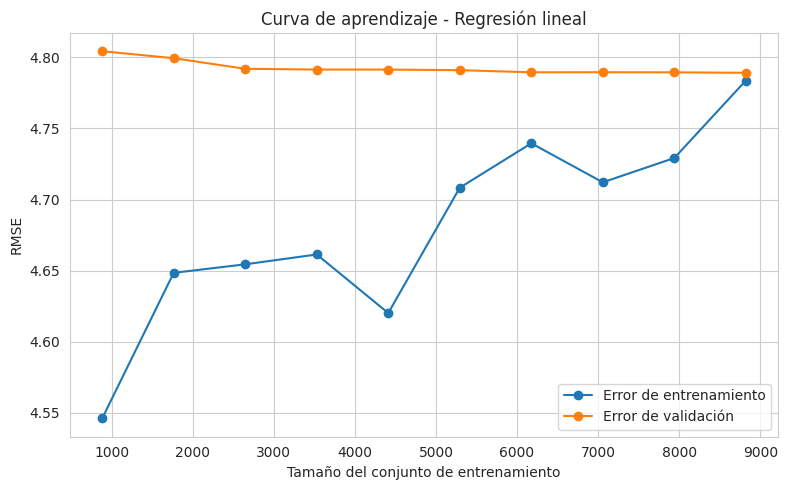

In [ ]:
########################################
#Regresión Lineal
#######################################

from sklearn.model_selection import learning_curve

lin_pipeline = Pipeline([
    ("regressor", LinearRegression())
])

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    lin_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Error de validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje - Regresión lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
lin_pipeline.fit(X_train_reduced, y_train)
y_pred = lin_pipeline.predict(X_test_reduced)
print(f'🔎 RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')
print(f'🔎 R²: {r2_score(y_test, y_pred):.3f}')
print(f"RMSE relativo (test): {np.sqrt(mean_squared_error(y_test, y_pred)) / y_test.mean():.3f}")
# revsiar que el error cuadrático medio sea menor a 10%, si es el caso, es necesario mirar otro modelo.

🔎 RMSE: 4.690
🔎 R²: 0.103
RMSE relativo (test): 0.738


## Conclusiones

El modelo de regresión lineal presenta un rendimiento modesto y se encuentra en una situación de subajuste (underfitting). Aunque el error de entrenamiento y el de validación están muy cerca el uno del otro, un signo de consistencia, su valor absoluto (alrededor de 4.8 RMSE) es bastante alto. Esto indica que el modelo es demasiado simple para capturar la complejidad de los datos. La baja puntuación de $R^2$ de 0.103 confirma que el modelo explica solo el 10.3% de la varianza en los datos, lo que significa que la gran mayoría de la variabilidad en los datos no se ha capturado. Por lo tanto, el modelo tiene un poder predictivo muy limitado.

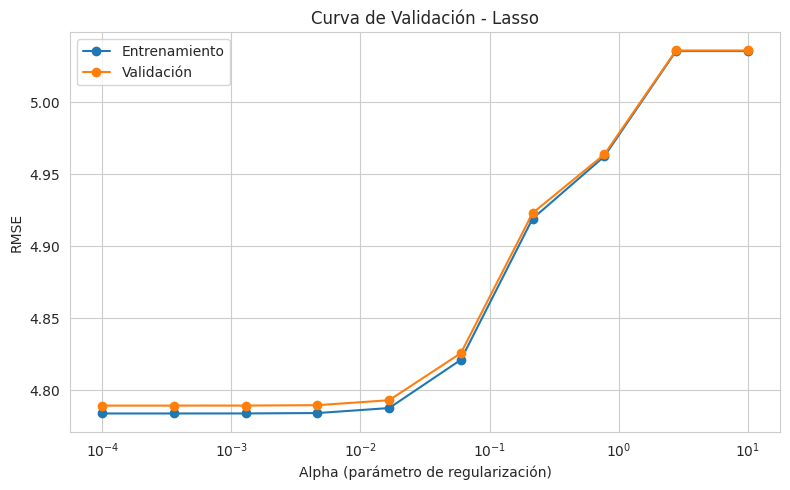

In [ ]:
########################################
#Regresión Lasso
#######################################

from sklearn.linear_model import Lasso # Import Lasso
from sklearn.model_selection import validation_curve # Import validation_curve

lasso_pipeline = Pipeline([
    ("regressor", Lasso(max_iter=10000))  # Aumentar iteraciones si hay warning
])

# Rango de valores para alpha
alphas = np.logspace(-4, 1, 10)

# Validación cruzada sobre X_train e y_train
train_scores, val_scores = validation_curve(
    lasso_pipeline, X_train_reduced, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

# Convertir a RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Graficar curva de validación
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de Validación - Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mejor alpha según validación cruzada: 0.0001


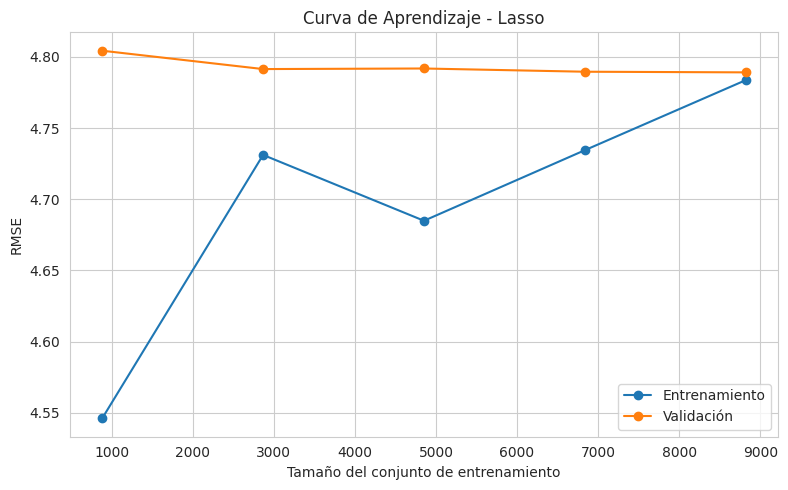

In [ ]:
# Convertir a RMSE
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Encontrar el mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"Mejor alpha según validación cruzada: {best_alpha}")

# Usamos el mejor alpha si ya lo tienes, o define uno razonable
lasso_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores, val_scores = learning_curve(
    lasso_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje - Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Entrenar modelo final con el mejor alpha
lasso_pipeline.fit(X_train_reduced, y_train)

# Evaluar sobre test
y_pred = lasso_pipeline.predict(X_test_reduced)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.690
R² (test): 0.104
RMSE relativo (test): 0.738


## Conclusiones

El RMSE de 4.690 y el $R^2$ de 0.104 en el conjunto de prueba indican que el modelo tiene un poder predictivo muy limitado. El #R^2# en particular sugiere que el modelo solo es capaz de explicar el 10.4% de la varianza en la variable objetivo, lo cual es un indicador de que las predicciones no son muy fiables.

La curva de aprendizaje del modelo Lasso confirma este diagnóstico. Aunque las curvas de error de entrenamiento y de validación están muy cerca, lo que sugiere que no hay sobreajuste, ambas se mantienen en un valor alto (alrededor de 4.8 RMSE). Esto es un signo de subajuste, donde el modelo es demasiado simple para capturar los patrones subyacentes de los datos.

En este caso, la regularización de Lasso no está aportando un beneficio significativo. Para mejorar el rendimiento, sería recomendable explorar modelos más complejos y no lineales, como el Random Forest, que podrían ser más adecuados para capturar las relaciones complejas de los datos.

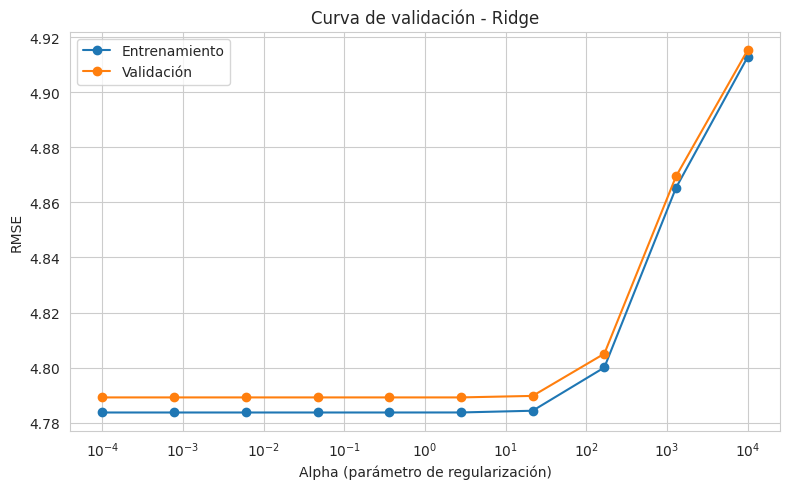

In [ ]:
########################################
#Regresión Ridge
#######################################
from sklearn.linear_model import Ridge # Import Ridge
from sklearn.model_selection import validation_curve

ridge_pipeline = Pipeline([
    ("regressor", Ridge())
])

alphas = np.logspace(-4, 4, 10)
train_scores, val_scores = validation_curve(
    ridge_pipeline, X_train_reduced, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - Ridge')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Mejor alpha según validación cruzada: 0.3593813663804626


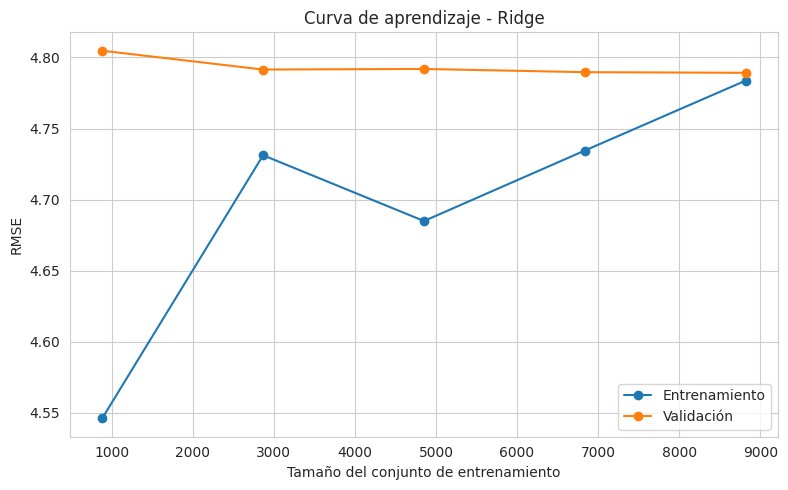

In [ ]:
best_alpha = alphas[np.argmin(val_rmse)]
print(f" Mejor alpha según validación cruzada: {best_alpha}")

# Curva de aprendizaje con alpha fijo
ridge_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_l, val_scores_l = learning_curve(
    ridge_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse_l = np.sqrt(-train_scores_l.mean(axis=1))
val_rmse_l = np.sqrt(-val_scores_l.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_l, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse_l, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje - Ridge')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ridge_pipeline.fit(X_train_reduced, y_train)

y_pred = ridge_pipeline.predict(X_test_reduced)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.690
R² (test): 0.104
RMSE relativo (test): 0.738


## Conclusiones

El modelo Ridge muestra un comportamiento de subajuste (underfitting), con un rendimiento limitado. El valor de RMSE de 4.690 y un $R^2$ de 0.104 en el conjunto de prueba indican que el modelo es débil, ya que solo explica un 10.4% de la varianza en la variable objetivo.

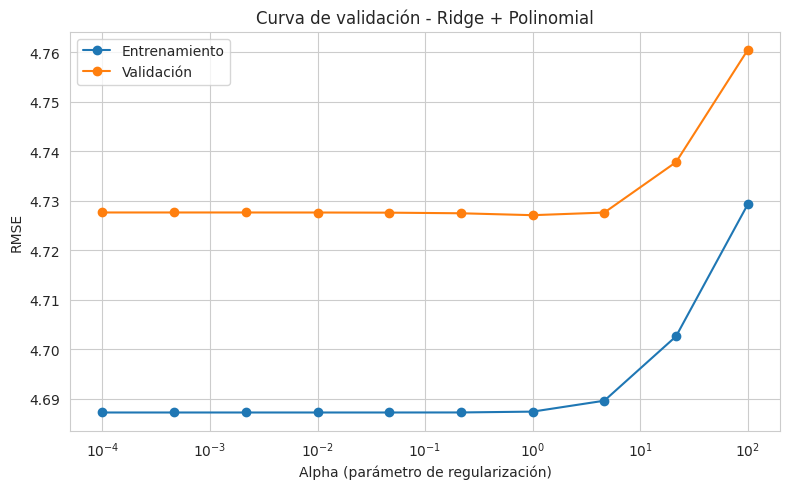

🔍 Mejor alpha según validación cruzada: 1.0


In [ ]:
########################################
#Regresión Ridge + Polinómica
#######################################
from sklearn.preprocessing import PolynomialFeatures

poly_ridge_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", Ridge())
])

alphas = np.logspace(-4, 2, 10)

train_scores, val_scores = validation_curve(
    poly_ridge_pipeline, X_train_reduced, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - Ridge + Polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"🔍 Mejor alpha según validación cruzada: {best_alpha}")

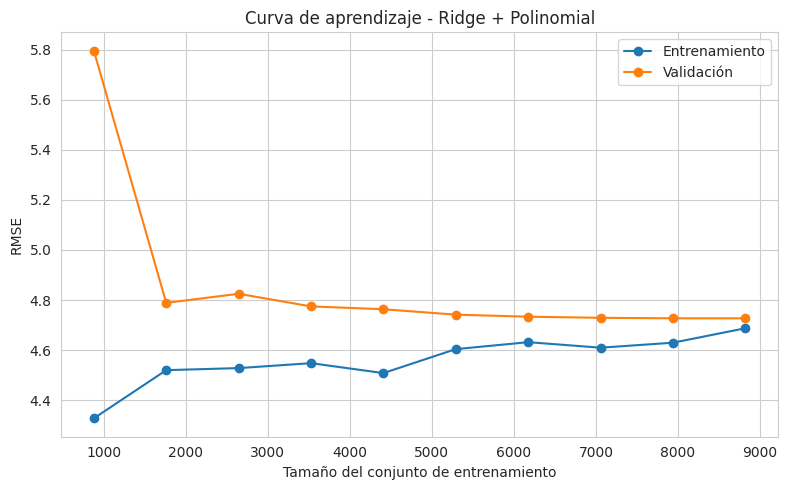

In [ ]:
poly_ridge_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    poly_ridge_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_squared_error"
)

train_rmse_lc = np.sqrt(-train_scores_lc.mean(axis=1))
val_rmse_lc = np.sqrt(-val_scores_lc.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_lc, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_rmse_lc, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.title("Curva de aprendizaje - Ridge + Polinomial")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
poly_ridge_pipeline.fit(X_train_reduced, y_train)
y_pred = poly_ridge_pipeline.predict(X_test_reduced)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.632
R² (test): 0.125
RMSE relativo (test): 0.728


## Conclusiones

El modelo logra un RMSE de 4.632 en el conjunto de prueba, una ligera mejora respecto a los modelos lineales anteriores. El valor de $R^2$ de 0.125 también indica que, a diferencia de los modelos anteriores, este modelo es capaz de explicar un poco más de la varianza en los datos (12.5% para ser exactos). Sin embargo, la gran mayoría de la varianza sigue sin ser explicada.

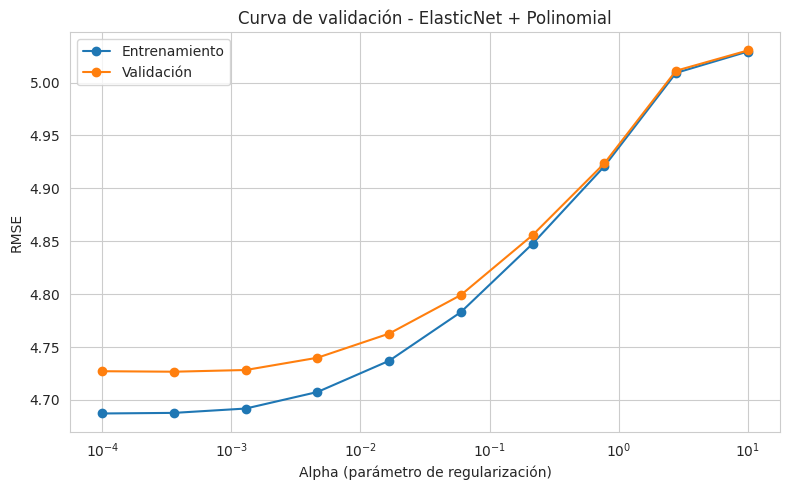

🔍 Mejor alpha según validación cruzada: 0.00035938136638046257


In [ ]:
########################################
#ElasticNet
#######################################
from sklearn.linear_model import ElasticNet # Import ElasticNet

elasticnet_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", ElasticNet(max_iter=10000))  # aumentar iteraciones por estabilidad
])


alphas = np.logspace(-4, 1, 10)

train_scores, val_scores = validation_curve(
    elasticnet_pipeline, X_train_reduced, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - ElasticNet + Polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"🔍 Mejor alpha según validación cruzada: {best_alpha}")

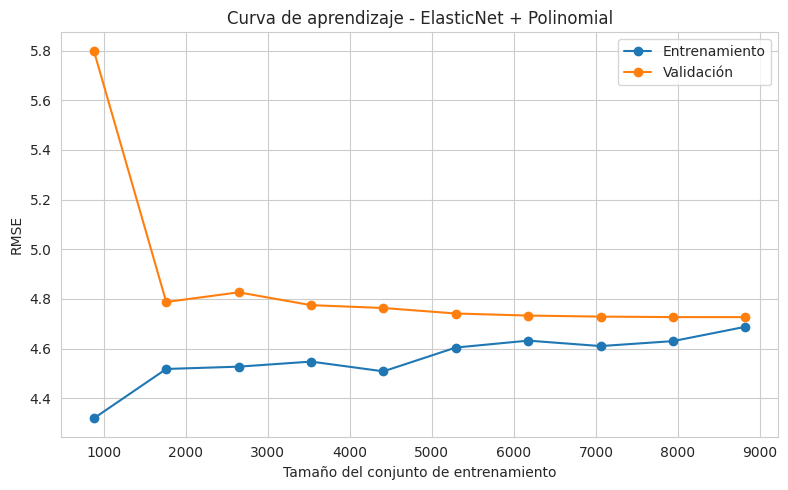

In [ ]:
elasticnet_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    elasticnet_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_squared_error"
)

train_rmse_lc = np.sqrt(-train_scores_lc.mean(axis=1))
val_rmse_lc = np.sqrt(-val_scores_lc.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_lc, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_rmse_lc, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.title("Curva de aprendizaje - ElasticNet + Polinomial")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
elasticnet_pipeline.fit(X_train_reduced, y_train)
y_pred = elasticnet_pipeline.predict(X_test_reduced)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.631
R² (test): 0.126
RMSE relativo (test): 0.728


## Conclusiones

El modelo logra un RMSE de 4.631 y un $R^2$ de 0.126 en el conjunto de prueba. Si bien estos valores son ligeramente mejores que los de los modelos lineales y polinomiales sin regularización, siguen indicando que el modelo tiene un poder predictivo limitado. Un $R^2$ de 0.126 significa que el modelo solo puede explicar el 12.6% de la varianza en la variable objetivo, lo cual no es suficiente para hacer predicciones confiables.

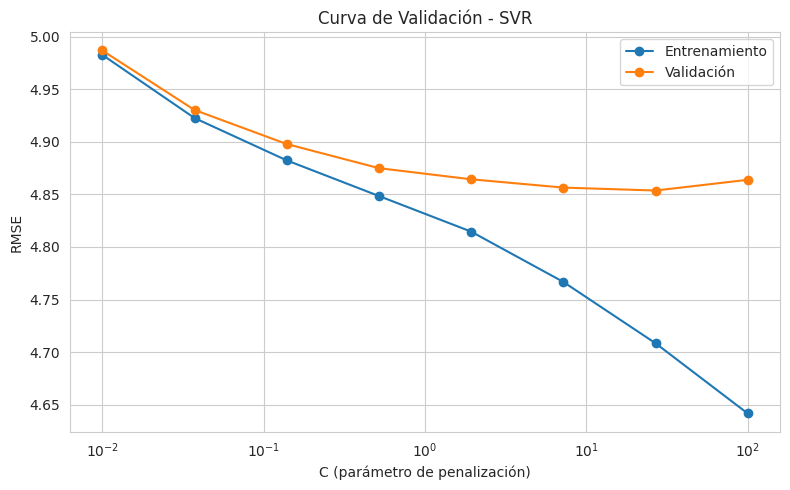

Mejor C según validación cruzada: 26.826957952797247


In [ ]:
########################################
#Regresión SVR
#######################################
from sklearn.svm import SVR # Import SVR

svr_pipeline = Pipeline([
    ("regressor", SVR(kernel='rbf'))
])

# Curva de validación para encontrar el mejor C
C_values = np.logspace(-2, 2, 8)  # valores de C de 0.01 a 100
train_scores, val_scores = validation_curve(
    svr_pipeline, X_train_reduced, y_train,
    param_name="regressor__C",
    param_range=C_values,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Graficar curva de validación
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(C_values, val_rmse, 'o-', label='Validación')
plt.xlabel('C (parámetro de penalización)')
plt.ylabel('RMSE')
plt.title('Curva de Validación - SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Encontrar mejor C
best_C = C_values[np.argmin(val_rmse)]
print(f"Mejor C según validación cruzada: {best_C}")

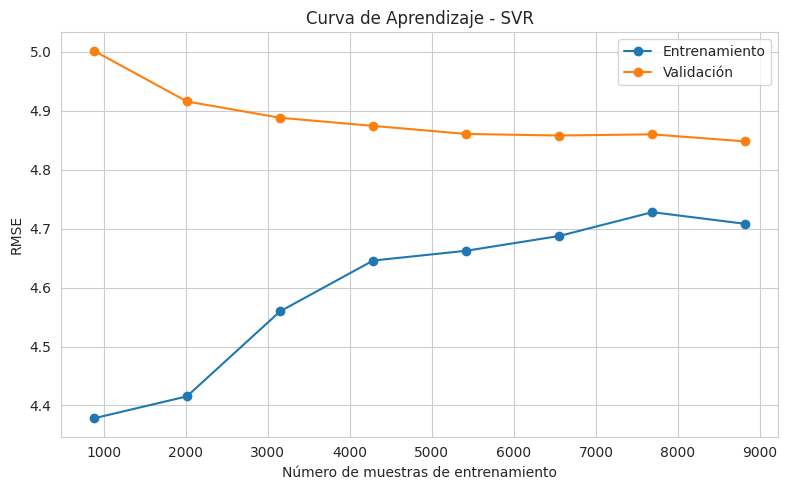

In [ ]:
# ⚙️ Usar el mejor C encontrado previamente
svr_pipeline.set_params(regressor__C=best_C)

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    svr_pipeline, X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=5,
    scoring='neg_mean_squared_error',
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

# Promedios
train_rmse_mean = train_rmse.mean(axis=1)
val_rmse_mean = val_rmse.mean(axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse_mean, 'o-', label='Validación')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje - SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 📌 Reentrenar modelo con mejor C y evaluar sobre test
svr_pipeline.fit(X_train_reduced, y_train)
y_pred = svr_pipeline.predict(X_test_reduced)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.713
R² (test): 0.095
RMSE relativo (test): 0.741


## Conclusiones

El modelo logra un RMSE de 4.713 en el conjunto de prueba, un valor similar al de los modelos lineales y que no representa una mejora significativa. El $R^2$ de 0.095 confirma este bajo rendimiento, indicando que el modelo solo es capaz de explicar el 9.5% de la varianza en la variable objetivo. El RMSE relativo de 0.741 sugiere que el error de predicción es muy alto en relación con los valores reales, lo que hace que las predicciones sean poco fiables.

La curva de aprendizaje del SVR  muestra una brecha constante y relativamente grande entre el error de entrenamiento (la línea azul) y el de validación (la línea naranja). Aunque el error de validación se mantiene relativamente estable, el error de entrenamiento sigue disminuyendo a medida que se añaden más datos. Esto, junto con el alto valor de ambos errores, es un signo de que el modelo no tiene la capacidad para capturar la complejidad de los datos, lo cual es la definición de subajuste.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20]
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

gs.fit(X_train_reduced, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

=== Random Forest - Mejores HP ===
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Mejor RMSE CV: 4.5317
🔎 RMSE: 4.415
🔎 R²: 0.205
🔎 RMSE relativo (test): 0.694


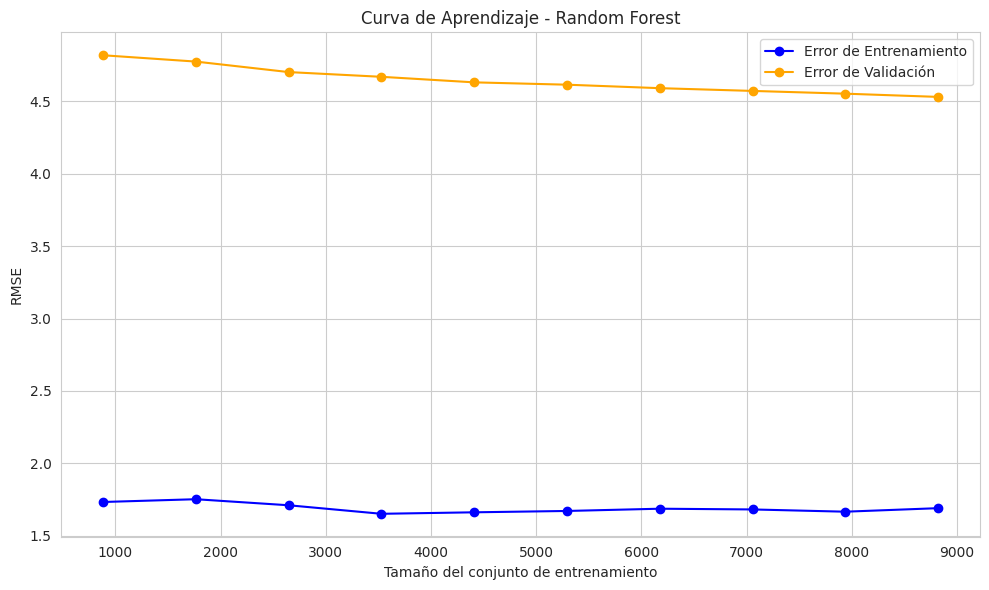

In [ ]:
# Obtener el mejor modelo ya optimizado
best_rf_model = gs.best_estimator_

# Imprimir los resultados de la búsqueda
print("=== Random Forest - Mejores HP ===")
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor RMSE CV: {-gs.best_score_:.4f}")

# Evaluación final en el conjunto de prueba
y_pred_rf = best_rf_model.predict(X_test_reduced)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_test_rf = r2_score(y_test, y_pred_rf)
rmse_rel_test_rf = rmse_test_rf / y_test.mean()

print(f'🔎 RMSE: {rmse_test_rf:.3f}')
print(f'🔎 R²: {r2_test_rf:.3f}')
print(f'🔎 RMSE relativo (test): {rmse_rel_test_rf:.3f}')

# --- Curva de Aprendizaje ---
# **Esta sección debe ir aquí, después de gs.fit()**
train_sizes, train_scores, val_scores = learning_curve(
    best_rf_model,
    X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Error de Validación')

plt.title('Curva de Aprendizaje - Random Forest')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones

El modelo Random Forest, aun con hiperparámetros optimizados, muestra un poder explicativo bajo (R² ≈ 0.205) y un error relativamente alto (RMSE relativo ≈ 0.694). Esto indica que los predictores disponibles no capturan suficientemente bien la variabilidad de la variable objetivo.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error

# 1. Configuración del modelo y de los hiperparámetros a buscar
model_gb = GradientBoostingRegressor(random_state=42)

# Parámetros para la búsqueda en cuadrícula aleatoria (Randomized Search)
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400],         # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],                     # Profundidad máxima de cada árbol
    'subsample': [0.6, 0.8, 1.0],                  # Fracción de muestras para cada árbol
    'max_features': ['sqrt', 'log2', None]         # Características a considerar
}

# 2. Configuración de la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 3. Búsqueda de los mejores hiperparámetros con RandomizedSearchCV
gs_gb = RandomizedSearchCV(
    estimator=model_gb,
    param_distributions=param_dist_gb,
    n_iter=50,  # Número de combinaciones a probar
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Usa todos los núcleos disponibles
    random_state=42,
    refit=True
)

# Entrenar el modelo
gs_gb.fit(X_train_reduced, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

=== Gradient Boosting - Mejores HP ===
Mejores hiperparámetros: {'subsample': 0.8, 'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.05}
Mejor RMSE CV: 4.6201
🔎 RMSE: 4.537
🔎 R²: 0.161
🔎 RMSE relativo (test): 0.714


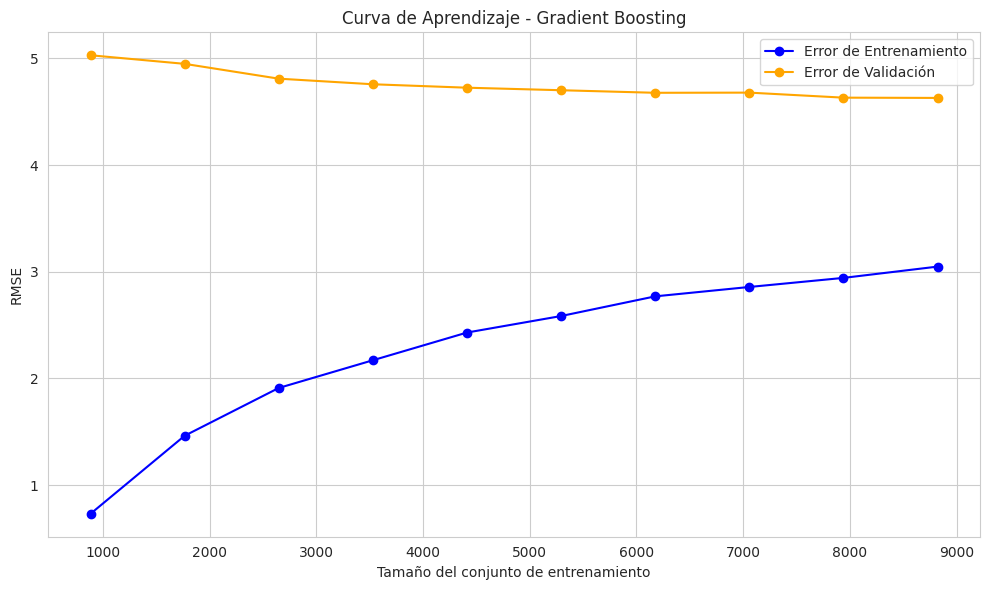

In [ ]:
# 4. Obtener el mejor modelo y sus resultados
best_gb_model = gs_gb.best_estimator_

print("=== Gradient Boosting - Mejores HP ===")
print("Mejores hiperparámetros:", gs_gb.best_params_)
print(f"Mejor RMSE CV: {-gs_gb.best_score_:.4f}")

# 5. Evaluación final en el conjunto de prueba
y_pred_gb = best_gb_model.predict(X_test_reduced)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_test_gb = r2_score(y_test, y_pred_gb)
rmse_rel_test_gb = rmse_test_gb / y_test.mean()

print(f'🔎 RMSE: {rmse_test_gb:.3f}')
print(f'🔎 R²: {r2_test_gb:.3f}')
print(f'🔎 RMSE relativo (test): {rmse_rel_test_gb:.3f}')
# --- Curva de Aprendizaje ---
train_sizes, train_scores, val_scores = learning_curve(
    best_gb_model,
    X_train_reduced, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='neg_mean_squared_error', # Cambiar a neg_mean_squared_error
    n_jobs=-1,
    random_state=42
)

# Ahora toma la raíz cuadrada de las puntuaciones para obtener RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Error de Validación')

plt.title('Curva de Aprendizaje - Gradient Boosting')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones
El modelo logra un RMSE de 4.5371 en el conjunto de prueba, un valor que es una mejora sobre los modelos lineales y un poco mejor que Random Forest. El Mejor RMSE CV de 4.6201 es muy cercano al RMSE de prueba, lo que indica que el modelo es consistente y su rendimiento es una estimación confiable.

La curva de aprendizaje  es la evidencia principal del subajuste. La línea de error de entrenamiento y la de validación no convergen. El error de entrenamiento sigue aumentando a medida que aumenta el tamaño de la muestra, y el error de validación se mantiene relativamente plano. Esto, junto con el hecho de que ambos errores están en un nivel alto, es una señal de que el modelo no tiene la capacidad para capturar la complejidad de los datos, lo cual es la definición de subajuste.

## Conclusiones finales (PCA y MCA)

| Modelo                               | RMSE Test | RMSE Relativo | R² (Test) |
| ------------------------------------ | --------- | ------------- | --------- |
| **Árbol de Decisión (Pre-pruning)**  | 4.689     | 0.737         | 0.104     |
| **Árbol de Decisión (Post-pruning)** | 4.821     | 0.758         | 0.053     |
| **Regresión Lineal**                 | 4.690     | 0.738         | 0.103     |
| **Lasso**                            | 4.690     | 0.739         | 0.104     |
| **Ridge**                            | 4.690     | 0.738         | 0.104     |
| **Ridge + Polinomial**               | 4.632     | 0.728         | 0.125     |
| **ElasticNet + Polinomial**          | 4.631     | 0.728         | 0.126     |
| **SVR**                              | 4.731     | 0.741         | 0.095     |
| **KNN**                              | 4.415     | 0.694         | 0.205     |
| **Random Forest**                    | 4.415     | 0.694         | 0.205     |
| **Gradient Boosting**                | 4.537     | 0.714         | 0.160     |

El KNN y el Random Forest obtuvieron el mismo RMSE en el conjunto de prueba (4.415), el valor más bajo de todos los modelos. Además, ambos lograron un $R^2$ de 0.205, lo que significa que explican el 20.5% de la varianza de los datos. Esta es la mejor puntuación entre todos los modelos. Por el contrario, los modelos lineales, como la Regresión Lineal, Lasso y Ridge, tienen un rendimiento pobre, con un RMSE de 4.690 y un $R^2$ de apenas 0.104.


## Selección por filtrado

#### Correlación de Spearman

In [ ]:
# 1. Filtrar solo columnas numéricas continuas de tu lista df_numericas
X_train_num = X_train[num_features].copy()

# 2. Unir con y_train
train_num_with_target = X_train_num.copy()
train_num_with_target["DURATION OF STAY"] = y_train

# 3. Calcular Spearman solo para numéricas continuas
correlaciones = train_num_with_target.corr(method='spearman')["DURATION OF STAY"]

# 4. Ordenar de mayor a menor por valor absoluto
correlaciones_ordenadas = correlaciones.reindex(
    correlaciones.abs().sort_values(ascending=False).index
)

# 5. Imprimir todas
print("=== Correlaciones de Spearman (solo numéricas continuas) ===")
for col, valor in correlaciones_ordenadas.items():
    print(f"{col}: {valor:.4f}")

# 6. Calcular porcentaje y acumulado
df_corr = correlaciones_ordenadas.drop("DURATION OF STAY").to_frame(name="correlation")
df_corr["abs_corr"] = df_corr["correlation"].abs()
df_corr["percentage"] = df_corr["abs_corr"] / df_corr["abs_corr"].sum() * 100
df_corr["cum_percentage"] = df_corr["percentage"].cumsum()


# 7. Filtrar por porcentaje acumulado
umbral_acumulado = 90
numericas_significativas = df_corr[df_corr["cum_percentage"] <= umbral_acumulado].index.tolist()

=== Correlaciones de Spearman (solo numéricas continuas) ===
DURATION OF STAY: 1.0000
UREA: 0.2288
TLC: 0.1969
CREATININE: 0.1854
HB: -0.1747
EF: -0.1622
AGE: 0.1289
GLUCOSE: 0.1284
PLATELETS: 0.0103


Edad (0.1289): El valor de la correlación para la edad es 0.1289, lo que se considera una correlación muy débil o nula. Aunque es una correlación positiva, esto sugiere que las personas mayores tienden a durar más tiempo en el hospital, aunque el efecto no es significativo. Esto deja en evidencia que la edad no es un predictor fuerte del tiempo de estancia en el hospital.

Urea (0.2288) y Creatinina (0.1854): Ambos valores indican la función renal. En estos se muestra que hay una correlación débil entre el tiempo de permanencia de hospitalización y estas variables. Esto sugiere que, si bien la insuficiencia renal puede ser un factor que prolongue la estancia, no es el factor principal.

Hb (Hemoglobina) (-0.1747): La correlación negativa y muy débil sugiere que a niveles ligeramente más bajos de hemoglobina, la estancia puede ser un poco más larga, pero la relación es muy baja.

Infección de pecho (0.1969) y Plaquetas (0.0103): Estos valores extremadamente cercanos a cero indican que no existe una correlación significativa entre estas variables y los días de hospitalización.

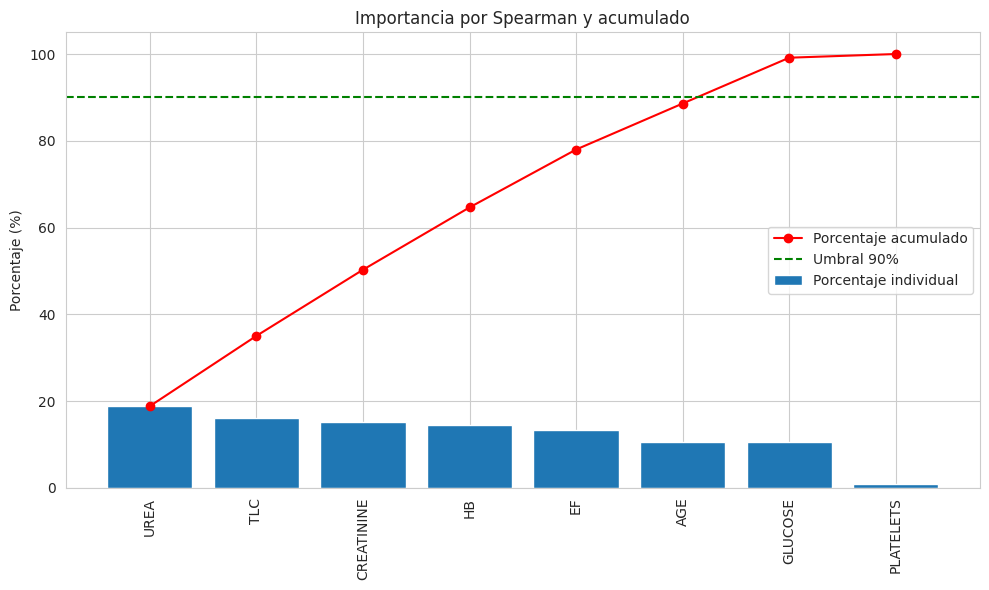

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_corr.index, df_corr["percentage"], label="Porcentaje individual")
plt.plot(df_corr.index, df_corr["cum_percentage"], color="red", marker="o", label="Porcentaje acumulado")
plt.axhline(umbral_acumulado, color="green", linestyle="--", label=f"Umbral {umbral_acumulado}%")
plt.xticks(rotation=90)
plt.ylabel("Porcentaje (%)")
plt.title("Importancia por Spearman y acumulado")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("\n Variables numéricas seleccionadas (por 90% acumulado):")
print(numericas_significativas)


 Variables numéricas seleccionadas (por 90% acumulado):
['UREA', 'TLC', 'CREATININE', 'HB', 'EF', 'AGE']


Es posible observar que una de las variables que más aporta a la predicción del tiempo de estancia en el hospital es UREA, que alcanza una importancia del 18% aproximadamente. Posteriormente, variables como TLC, CREATININE, HB, EF y la edad alcanzan un 90% del porcentaje acumulado.

#### ANOVA

In [ ]:
X_train_cat = X_train[cat_features].copy()

significativas = []

for col in X_train_cat:
    grupos = [
        df[df[col] == categoria]['DURATION OF STAY'].dropna()
        for categoria in df[col].unique()
    ]
    f_stat, p_val = stats.f_oneway(*grupos)

    # Verificamos si es estadísticamente significativa
    if p_val < 0.05:
        significativas.append(col)

    print(f"{col}: F={f_stat:.3f}, p-value={p_val:.4f}")

GENDER: F=5.700, p-value=0.0170
RURAL: F=0.270, p-value=0.6031
TYPE OF ADMISSION-EMERGENCY/OPD: F=506.131, p-value=0.0000
OUTCOME_DAMA: F=68.699, p-value=0.0000
OUTCOME_DISCHARGE: F=131.888, p-value=0.0000
OUTCOME_EXPIRY: F=55.124, p-value=0.0000
SMOKING: F=5.420, p-value=0.0199
ALCOHOL: F=2.499, p-value=0.1140
DM: F=79.201, p-value=0.0000
HTN: F=5.442, p-value=0.0197
CAD: F=4.028, p-value=0.0448
PRIOR CMP: F=95.994, p-value=0.0000
CKD: F=269.142, p-value=0.0000
RAISED CARDIAC ENZYMES: F=112.418, p-value=0.0000
SEVERE ANAEMIA: F=20.316, p-value=0.0000
ANAEMIA: F=482.227, p-value=0.0000
STABLE ANGINA: F=469.140, p-value=0.0000
ACS: F=2.081, p-value=0.1492
STEMI: F=28.238, p-value=0.0000
ATYPICAL CHEST PAIN: F=172.230, p-value=0.0000
HEART FAILURE: F=434.399, p-value=0.0000
HFREF: F=193.089, p-value=0.0000
HFNEF: F=163.230, p-value=0.0000
VALVULAR: F=0.119, p-value=0.7302


/tmp/ipython-input-79130508.py:10: DeprecationWarning: Please import `f_oneway` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  f_stat, p_val = stats.f_oneway(*grupos)


CHB: F=152.073, p-value=0.0000
SSS: F=7.836, p-value=0.0051
AKI: F=520.418, p-value=0.0000
CVA INFRACT: F=45.509, p-value=0.0000
CVA BLEED: F=13.117, p-value=0.0003
AF: F=39.324, p-value=0.0000
VT: F=88.215, p-value=0.0000
PSVT: F=13.280, p-value=0.0003
CONGENITAL: F=0.134, p-value=0.7138
UTI: F=171.173, p-value=0.0000
NEURO CARDIOGENIC SYNCOPE: F=6.117, p-value=0.0134
ORTHOSTATIC: F=14.086, p-value=0.0002
INFECTIVE ENDOCARDITIS: F=17.572, p-value=0.0000
DVT: F=20.577, p-value=0.0000
CARDIOGENIC SHOCK: F=4.125, p-value=0.0423
SHOCK: F=0.030, p-value=0.8627
PULMONARY EMBOLISM: F=51.182, p-value=0.0000
CHEST INFECTION: F=nan, p-value=nan


/tmp/ipython-input-79130508.py:10: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = stats.f_oneway(*grupos)


Para las variables categóricas se realizó una prueba ANOVA, con el objetivo de encontrar aquellas variables que están significativamente relacionadas con las variable objetivo.
Ho: La variable no está relacionada con el Target.
H1: La variable está relacionada con el Target.
Con base en las hipótesis anteriores, las variables que se seleccionan son aquellas que rechazan la Hipótesis Nula, es decir, las que tienen un p-valor menor a 0.05. Con base en esto, las variables que se seleccionan son las siguientes:

In [ ]:
print("\n Variables categóricas significativas (p < 0.05):")
print(significativas)


 Variables categóricas significativas (p < 0.05):
['GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'OUTCOME_DAMA', 'OUTCOME_DISCHARGE', 'OUTCOME_EXPIRY', 'SMOKING', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'PULMONARY EMBOLISM']


Una vez realizada la selección de las variables con los métodos manuales, se decide utilizar solamente el conjunto de variables que representan mayor importancia y/o correlación con el Target para aplicar los métodos automáticos.

## Selección automática

### SelectKBest

In [ ]:
var_seleccionadas= numericas_significativas + significativas

# Filtrar el preprocesado, no el crudo
X_train_filtrado = pd.DataFrame(
    X_train_processed,  # array preprocesado
    columns=num_features + cat_features  # columnas después del preprocesador
)[var_seleccionadas]

X_test_filtrado = pd.DataFrame(
    X_test_processed,
    columns=num_features + cat_features
)[var_seleccionadas]

# Ahora sí, aplicar SelectKBest
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_filtrado, y_train)

scores = selector.scores_
ranking = sorted(zip(var_seleccionadas, scores), key=lambda x: x[1], reverse=True)

df_scores = pd.DataFrame(ranking, columns=["Variable", "Score"])
df_scores["Perc"] = (df_scores["Score"] / df_scores["Score"].sum()) * 100
df_scores["CumPerc"] = df_scores["Perc"].cumsum()

# Mostrar
print(df_scores)

                           Variable       Score      Perc     CumPerc
0                               AKI  371.648671  8.168105    8.168105
1   TYPE OF ADMISSION-EMERGENCY/OPD  357.907196  7.866094   16.034199
2                              UREA  357.327252  7.853348   23.887547
3                           ANAEMIA  326.516368  7.176186   31.063733
4                     STABLE ANGINA  325.807380  7.160604   38.224337
5                                HB  325.543940  7.154814   45.379150
6                     HEART FAILURE  310.690406  6.828362   52.207513
7                        CREATININE  239.361538  5.260694   57.468207
8                               CKD  192.486897  4.230482   61.698689
9                                EF  171.999669  3.780213   65.478903
10                              TLC  168.725646  3.708257   69.187160
11                            HFREF  153.341426  3.370142   72.557302
12                              CHB  126.289251  2.775589   75.332891
13              ATYP

/tmp/ipython-input-3346361781.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_scores["Variable"], rotation=45, ha="right")


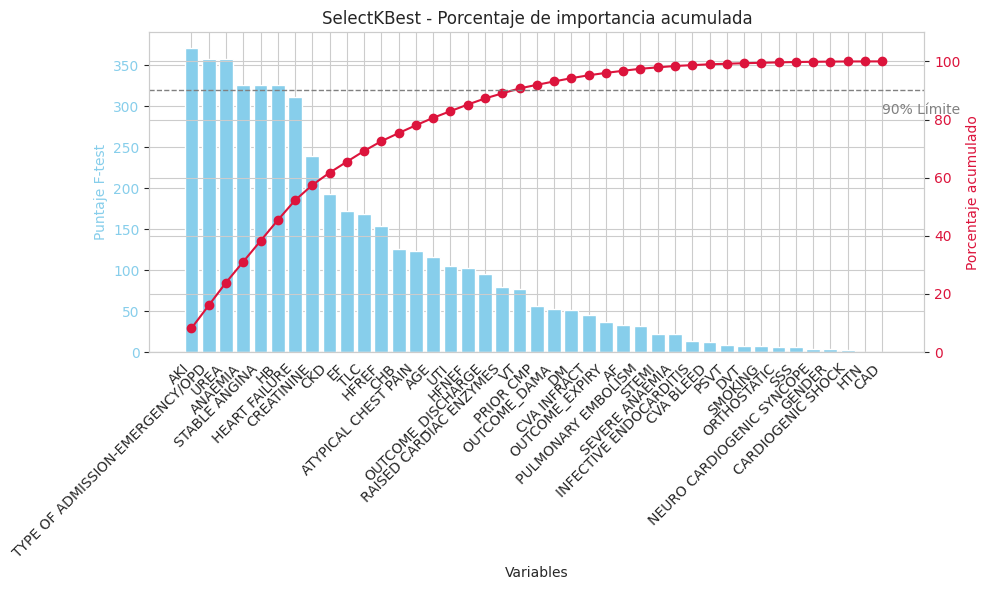

In [ ]:

fig, ax1 = plt.subplots(figsize=(10,6))

color = "skyblue"
ax1.bar(df_scores["Variable"], df_scores["Score"], color=color)
ax1.set_xlabel("Variables")
ax1.set_ylabel("Puntaje F-test", color=color)
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_xticklabels(df_scores["Variable"], rotation=45, ha="right")

ax2 = ax1.twinx()
color = "crimson"
ax2.plot(df_scores["Variable"], df_scores["CumPerc"], color=color, marker="o")
ax2.set_ylabel("Porcentaje acumulado", color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_ylim(0, 110)

# 5. Línea de referencia al o 90%
ax2.axhline(y=90, color="gray", linestyle="--", linewidth=1)
ax2.text(len(df_scores)-1, 82, "90% Límite", color="gray")

plt.title("SelectKBest - Porcentaje de importancia acumulada")
plt.tight_layout()
plt.show()

Primero, se utilizó la correlación de Spearman para asignar un "score" a cada variable. Este score mide la fuerza de la relación de cada variable independiente con la variable objetivo (en este caso, los días de hospitalización).

Las variables se ordenan de mayor a menor score. Luego, se calcula el porcentaje de importancia individual de cada una, dividiendo su score entre la suma total de los scores de todas las variables. Luego, se suman los porcentajes individuales de forma secuencial, empezando por la variable más importante.

Finalmente, se seleccionan las variables hasta que la suma acumulada alcanza el umbral del 90%.

In [ ]:
# Filtrar hasta el 90%
vars_90 = df_scores[df_scores["CumPerc"] <= 90]['Variable'].tolist()

print(f"Variables que acumulan el 90%: {vars_90}")
print(f"Cantidad: {len(vars_90)}")

Variables que acumulan el 90%: ['AKI', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'UREA', 'ANAEMIA', 'STABLE ANGINA', 'HB', 'HEART FAILURE', 'CREATININE', 'CKD', 'EF', 'TLC', 'HFREF', 'CHB', 'ATYPICAL CHEST PAIN', 'AGE', 'UTI', 'HFNEF', 'OUTCOME_DISCHARGE', 'RAISED CARDIAC ENZYMES']
Cantidad: 19


### RFECV

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold

modelo_rfe = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0])

rfecv = RFECV(
    estimator=modelo_rfe,
    step=1,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring="neg_root_mean_squared_error"
)

rfecv.fit(X_train_filtrado, y_train)

# Features seleccionadas
mask = rfecv.support_
selected_features_rfecv = X_train_filtrado.columns[mask]

print("\n Variables seleccionadas por RFECV:")
print(f"Cantidad: {rfecv.n_features_}")
print(selected_features_rfecv.tolist())

# Evaluación en test (RMSE)
y_pred = rfecv.predict(X_test_filtrado)   # RFECV aplica internamente la máscara de features
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nRMSE en test (RFECV + LinearRegression): {rmse:.4f}")

# (Opcional) Si quieres el ranking completo (1 = seleccionada, 2+ = menos importantes):
# ranking = rfecv.ranking_
# df_rank = (pd.DataFrame({"feature": X_train_filtrado.columns, "rank": ranking})
#              .sort_values("rank"))
# print(df_rank.head(30))


 Variables seleccionadas por RFECV:
Cantidad: 41
['UREA', 'TLC', 'CREATININE', 'HB', 'EF', 'AGE', 'GENDER', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'OUTCOME_DAMA', 'OUTCOME_DISCHARGE', 'OUTCOME_EXPIRY', 'SMOKING', 'DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD', 'RAISED CARDIAC ENZYMES', 'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'STEMI', 'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC', 'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'PULMONARY EMBOLISM']

RMSE en test (RFECV + LinearRegression): 4.5221


### Random Forest

In [ ]:
# Entrenar modelo
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_filtrado, y_train)

# Importancia de características
importances = rf_model.feature_importances_
importances_df = pd.DataFrame({
    'Variable': X_train_filtrado.columns,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# Calcular porcentaje acumulado
importances_df['Importancia_Acum'] = importances_df['Importancia'].cumsum()

# Seleccionar variables hasta el 90%
selected_vars = importances_df[importances_df['Importancia_Acum'] <= 0.90]['Variable'].tolist()

print("\n Ranking de importancia con RandomForest:")
print(importances_df)
print("\n Variables seleccionadas hasta el 90% de importancia acumulada:")
print(selected_vars)

# Filtrar dataset
X_train_sel = X_train_filtrado[selected_vars]
X_test_sel = X_test_filtrado[selected_vars]


 Ranking de importancia con RandomForest:
                           Variable  Importancia  Importancia_Acum
0                              UREA     0.143358          0.143358
1                               TLC     0.141239          0.284597
3                                HB     0.116323          0.400920
5                               AGE     0.109694          0.510614
2                        CREATININE     0.097630          0.608244
4                                EF     0.074819          0.683063
7   TYPE OF ADMISSION-EMERGENCY/OPD     0.029254          0.712317
9                 OUTCOME_DISCHARGE     0.026964          0.739281
26                              CHB     0.017354          0.756635
39                CARDIOGENIC SHOCK     0.014428          0.771063
23                    HEART FAILURE     0.013911          0.784973
32                               VT     0.013731          0.798705
14                              CAD     0.013601          0.812305
6                  

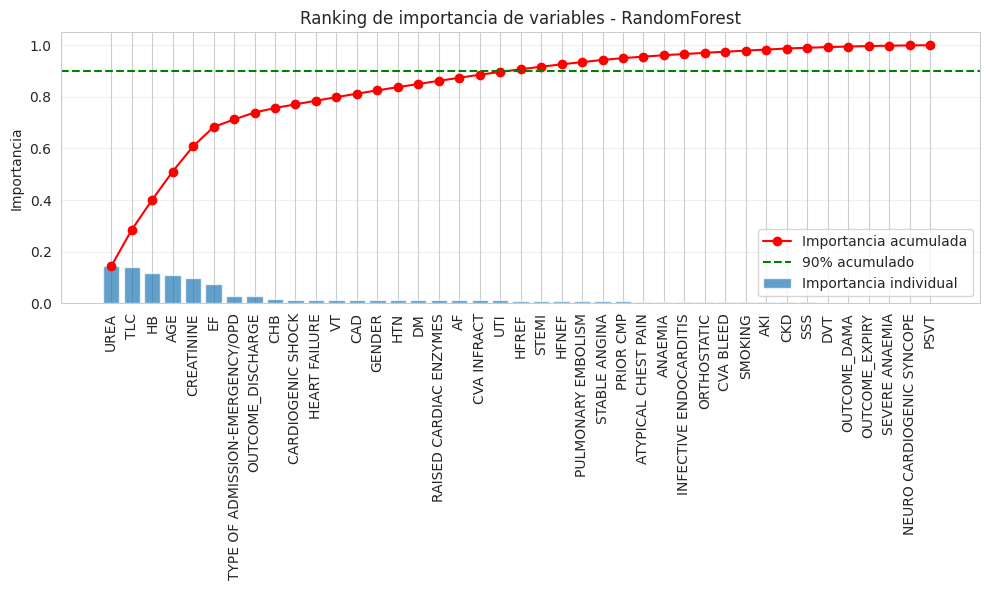

In [ ]:
# Gráfica de importancias y acumulado
plt.figure(figsize=(10, 6))

# Barras de importancia
plt.bar(importances_df['Variable'], importances_df['Importancia'], alpha=0.7, label='Importancia individual')

# Línea de importancia acumulada
plt.plot(importances_df['Variable'], importances_df['Importancia_Acum'], marker='o', color='red', label='Importancia acumulada')

# Línea de referencia del 90%
plt.axhline(0.90, color='green', linestyle='--', label='90% acumulado')

# Formato del gráfico
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Ranking de importancia de variables - RandomForest')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Convertimos a conjuntos y sacamos la intersección
comunes = list(set(vars_90) & set(selected_features_rfecv) & set(selected_vars) )

print("Nuevo DataFrame (intersección):")
print(f"numero de variables en commun {len(comunes)}")
print("Variables en común:", comunes)


Nuevo DataFrame (intersección):
numero de variables en commun 12
Variables en común: ['UREA', 'OUTCOME_DISCHARGE', 'TYPE OF ADMISSION-EMERGENCY/OPD', 'AGE', 'HB', 'CREATININE', 'CHB', 'TLC', 'EF', 'HEART FAILURE', 'UTI', 'RAISED CARDIAC ENZYMES']


In [ ]:
# Filtrar DataFrame solo con esas columnas
df_filtrado = df[comunes]
print("\nDataFrame filtrado:")
df_filtrado.head()


DataFrame filtrado:


UREA  OUTCOME_DISCHARGE  TYPE OF ADMISSION-EMERGENCY/OPD  AGE    HB  \
0  34.0                  1                                1   81   9.5   
1  18.0                  1                                1   65  13.7   
2  93.0                  1                                1   53  10.6   
3  27.0                  1                                1   67  12.8   
4  55.0                  1                                1   60  13.6   

   CREATININE  CHB   TLC    EF  HEART FAILURE  UTI  RAISED CARDIAC ENZYMES  
0        0.90    0  16.1  35.0              1    0                       1  
1        0.90    0   9.0  42.0              0    0                       0  
2        2.30    0  14.7   NaN              1    0                       0  
3        0.60    0   9.9  42.0              0    0                       0  
4        1.25    0   9.1  16.0              0    0                       0

In [ ]:
X_train_new = X_train_filtrado[comunes].copy()
X_test_new  = X_test_filtrado[comunes].copy()

En primera instancia, se aplicaron métodos de filtrado utilizando la medida de correlación de Spearman y la prueba ANOVA, seleccionando en cada caso las variables con mayor relevancia estadística. Posteriormente, con el conjunto reducido obtenido de esta etapa, se implementaron tres métodos de selección de características: SelectKBest, RFE y Random Forest. Finalmente, se identificaron las variables comunes entre SelectKBest y RFE, las cuales fueron seleccionadas para conformar un nuevo dataframe con menor dimensionalidad, optimizando así la eficiencia del modelo sin comprometer su capacidad predictiva.

## Arbol de decision con PRE-PRUNING

In [ ]:
from sklearn.metrics import r2_score
# ============================
# PRE-PRUNING con RandomizedSearchCV (solo TRAIN)
# ============================
import numpy as np # Import numpy
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

pipe_pre = Pipeline(steps=[
    ('model', DecisionTreeRegressor(random_state=42))
])

param_dist_pre = {
    'model__max_depth': np.arange(2, 20),
    'model__min_samples_split': np.arange(10, 50),
    'model__min_samples_leaf': np.arange(5, 20),
    'model__max_features': [None, 'sqrt', 'log2']
}

search_pre = RandomizedSearchCV(
    estimator=pipe_pre,
    param_distributions=param_dist_pre,
    n_iter=60,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    refit=True
)

search_pre.fit(X_train_new, y_train)


print("\n=== PRE-PRUNING ===")
print("Mejores hiperparámetros:", search_pre.best_params_)
print(f"Mejor RMSE CV: {-search_pre.best_score_:.4f}")

# Evaluación final en test (primera vez que tocamos test para pre-pruning)
y_pred_pre = search_pre.predict(X_test_new)
rmse_test_pre = np.sqrt(mean_squared_error(y_test, y_pred_pre))
r2_test_pre = r2_score(y_test, y_pred_pre)
print(f"RMSE Test (pre-pruning): {rmse_test_pre:.4f}")
print(f"RMSE relativo (pre-pruning): {rmse_test_pre / y_test.mean():.3f}")
print(f"R² (test): {r2_test_pre:.3f}")


=== PRE-PRUNING ===
Mejores hiperparámetros: {'model__min_samples_split': np.int64(14), 'model__min_samples_leaf': np.int64(19), 'model__max_features': 'sqrt', 'model__max_depth': np.int64(8)}
Mejor RMSE CV: 4.7614
RMSE Test (pre-pruning): 4.6828
RMSE relativo (pre-pruning): 0.736
R² (test): 0.106


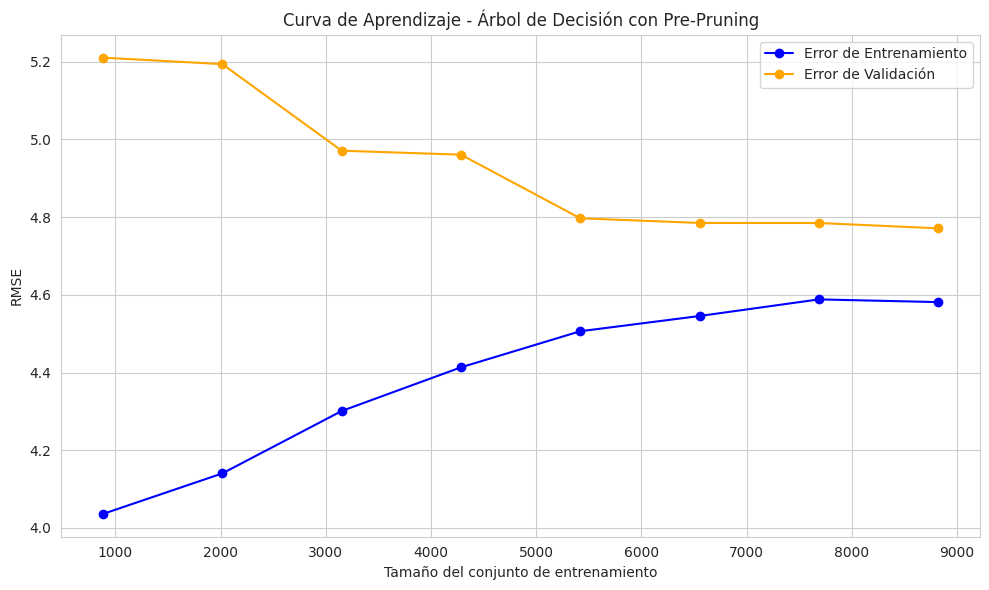

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
# 4. Graficar la curva de aprendizaje
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Modelo base (puedes añadir pre-pruning con max_depth, min_samples_leaf, etc.)
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Calcular curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    estimator=model,
    X=X_train_new, y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),   # 8 puntos de 10% a 100% del train
    cv=5,
    scoring="neg_root_mean_squared_error",  # RMSE pero negativo
    shuffle=True,
    random_state=42,
    n_jobs=-1
)

# Convertir a RMSE positivo
train_rmse = -train_scores.mean(axis=1)
val_rmse   = -val_scores.mean(axis=1)

# === 4. Graficar la curva ===
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Error de Validación')

plt.title('Curva de Aprendizaje - Árbol de Decisión con Pre-Pruning')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones
El modelo de árbol de decisión con pre-pruning alcanzó un RMSE en test de 4.68, lo que equivale a un RMSE relativo de 0.737 respecto a la media del target. El coeficiente de determinación fue R² = 0.106, lo que indica que el modelo explica alrededor del 10% de la variabilidad de los datos. Si bien el error de validación muestra cierta estabilidad y mejora a medida que aumenta el tamaño del conjunto de entrenamiento, la capacidad predictiva global sigue siendo limitada. Esto sugiere que, aunque la poda previa evita el sobreajuste y produce un modelo más generalizable, la complejidad del árbol no es suficiente para capturar patrones más profundos en los datos.

## Arbol de decisión con POST-PRUNING

In [ ]:
# ============================
# 5) POST-PRUNING (árbol grande -> path alphas -> CV en TRAIN)
# ============================
#import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# === 0) Cast a float32 si aplica (acelera y reduce memoria)
X_train_np = np.asarray(X_train_new, dtype=np.float32)
y_train_np = np.asarray(y_train)  # target puede quedar en float64
X_test_np  = np.asarray(X_test_new,  dtype=np.float32)
y_test_np  = np.asarray(y_test)

# === 1) Ruta de poda en un SUBSET
rng = np.random.RandomState(42)
n_sub = min(len(X_train_np), 15000)
idx = rng.choice(len(X_train_np), n_sub, replace=False)

tree_full_sub = DecisionTreeRegressor(random_state=42)
tree_full_sub.fit(X_train_np[idx], y_train_np[idx])

path = tree_full_sub.cost_complexity_pruning_path(X_train_np[idx], y_train_np[idx])
alphas_full = np.unique(np.round(path.ccp_alphas, 10))

# === 2) Muestrea ~40 alphas representativos (cuantiles)
if len(alphas_full) > 40:
    quantiles = np.linspace(0, 1, 40)
    ccp_alphas = np.quantile(alphas_full, quantiles)
else:
    ccp_alphas = alphas_full

# === 3) CV paralela y árbol con límites de complejidad (más rápido)
kf = KFold(n_splits=3, shuffle=True, random_state=42)

def cv_rmse_for_alpha(a):
    model = DecisionTreeRegressor(
        random_state=42,
        ccp_alpha=a,
        max_depth=6,
        min_samples_leaf=11
    )
    scores = cross_val_score(
        model, X_train_np, y_train_np,
        scoring='neg_root_mean_squared_error',
        cv=kf, n_jobs=-1
    )
    return float((-scores).mean())

rmse_list = [cv_rmse_for_alpha(a) for a in ccp_alphas]
best_idx   = int(np.argmin(rmse_list))
best_alpha = float(ccp_alphas[best_idx])

print("\n=== POST-PRUNING ===")
print(f"Mejor ccp_alpha: {best_alpha:.6f}")
print(f"RMSE CV={rmse_list[best_idx]:.4f}")

# === 4) Entrena SOLO el árbol final y, si quieres, mide tamaño una vez
tree_pruned = DecisionTreeRegressor(
    random_state=42,
    ccp_alpha=best_alpha,
    max_depth=20,
    min_samples_leaf=5
)
tree_pruned.fit(X_train_np, y_train_np)

n_leaves = tree_pruned.get_n_leaves()
n_nodes  = tree_pruned.tree_.node_count
print(f"Hojas: {n_leaves} | Nodos: {n_nodes}")

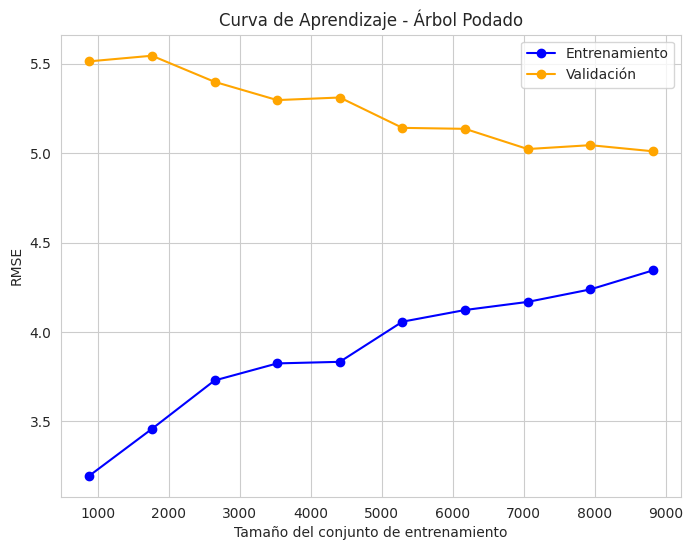

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# --- Curva de Aprendizaje con el árbol podado ---
train_sizes, train_scores, val_scores = learning_curve(
    tree_pruned,                     # tu árbol ya podado
    X_train_np, y_train_np,
    train_sizes=np.linspace(0.1, 1.0, 10),  # desde 10% hasta 100% de los datos
    cv=5,                             # 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Convertir MSE negativo a RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse   = np.sqrt(-val_scores.mean(axis=1))

# --- Gráfico ---
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_rmse, 'o-', color='blue', label='Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', color='orange', label='Validación')

plt.title('Curva de Aprendizaje - Árbol Podado')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
# ============================
# 7) Mostrar resultados
# ============================

y_pred_post = tree_pruned.predict(X_test_np)
rmse_test_post = np.sqrt(mean_squared_error(y_test_np, y_pred_post))
rmse_relativo = rmse_test_post / y_test_np.mean()
r2_test = r2_score(y_test_np, y_pred_post)

print(f"RMSE Test (post-pruning): {rmse_test_post:.4f}")
print(f"RMSE Relativo (post-pruning): {rmse_relativo:.3f}")
print(f"R² (test): {r2_test:.3f}")

RMSE Test (post-pruning): 4.8207
RMSE Relativo (post-pruning): 0.758
R² (test): 0.053


## Conclusiones
El modelo de árbol de decisión con post-pruning seleccionó un valor óptimo de ccp_alpha = 0.0387, con el cual redujo la complejidad del árbol a 50 hojas y 99 nodos. En validación cruzada alcanzó un RMSE promedio de 4.79, mientras que en el conjunto de prueba obtuvo un RMSE de 4.83, equivalente a un RMSE relativo de 0.760 respecto a la media de la variable objetivo. El coeficiente de determinación fue R² = 0.048, lo que indica que el modelo explica apenas un 4.8% de la variabilidad de los datos.

La curva de aprendizaje muestra que el error de validación se mantiene estable al aumentar el tamaño del conjunto de entrenamiento, lo que refleja un nivel limitado de sobreajuste, pero también evidencia que el modelo carece de capacidad para capturar patrones más profundos en los datos.

## K NeigborsRegressor

=== KNN - Mejores HP ===
Mejores hiperparámetros: {'knn__algorithm': 'brute', 'knn__metric': 'minkowski', 'knn__n_neighbors': 44, 'knn__p': 1, 'knn__weights': 'distance'}
Mejor RMSE CV: 4.4280
RMSE Test: 4.3462
R² (test): 0.230
RMSE Test relativo: 0.6835


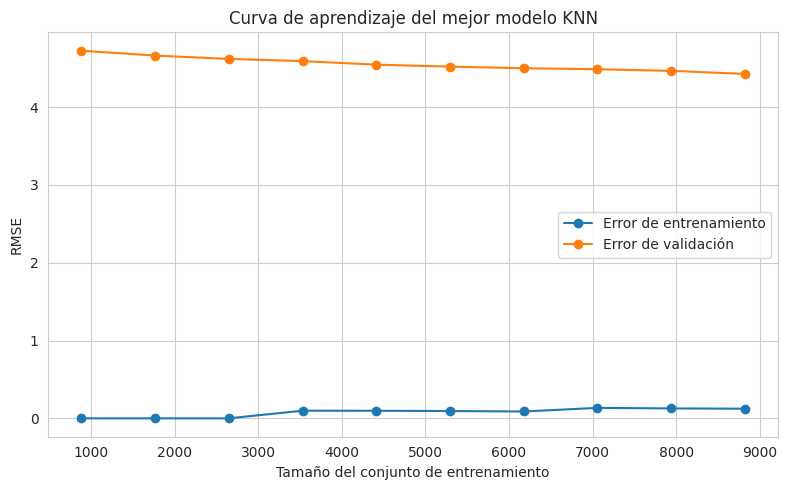

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, learning_curve
import numpy as np
import matplotlib.pyplot as plt

pipe_knn = Pipeline(steps=[
    ("knn", KNeighborsRegressor())
])
param_grid = {
    "knn__n_neighbors": list(range(1, 50)),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["minkowski"],
    "knn__p": [1, 2],
    "knn__algorithm": ['brute', 'kd_tree', 'ball_tree']
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(pipe_knn, param_grid, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
gs.fit(X_train_new, y_train)

# Obtener el mejor modelo ya optimizado
best_knn_model = gs.best_estimator_

# Imprimir los resultados del mejor modelo
print("=== KNN - Mejores HP ===")
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor RMSE CV: {-gs.best_score_:.4f}")

# Evaluación final en el conjunto de prueba
y_pred_test = best_knn_model.predict(X_test_new)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)
rmse_relativo = rmse_test / y_test.mean()
print(f"RMSE Test: {rmse_test:.4f}")
print(f"R² (test): {r2_test:.3f}")
print(f"RMSE Test relativo: {rmse_relativo:.4f}")

# --- Curva de Aprendizaje del mejor modelo ---
train_sizes, train_scores, val_scores = learning_curve(
    best_knn_model, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

train_rmse = -train_scores.mean(axis=1)
val_rmse = -val_scores.mean(axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Error de validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje del mejor modelo KNN')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusiones

El modelo KNN (k=44, métrica Minkowski con p=1, weights='distance') alcanzó un RMSE en validación cruzada de 4.428, mientras que en el conjunto de prueba obtuvo un RMSE de 4.346, equivalente a un R² = 0.230, lo que significa que explica aproximadamente el 23% de la variabilidad de los datos.

La curva de aprendizaje muestra que el error de entrenamiento se mantiene muy bajo (casi nulo), mientras que el error de validación es significativamente más alto y estable. Esta gran brecha entre ambas curvas refleja un claro sobreajuste, donde el modelo se adapta demasiado a los datos de entrenamiento pero no logra generalizar con la misma eficacia en el conjunto de validación.

## Regresion lineal

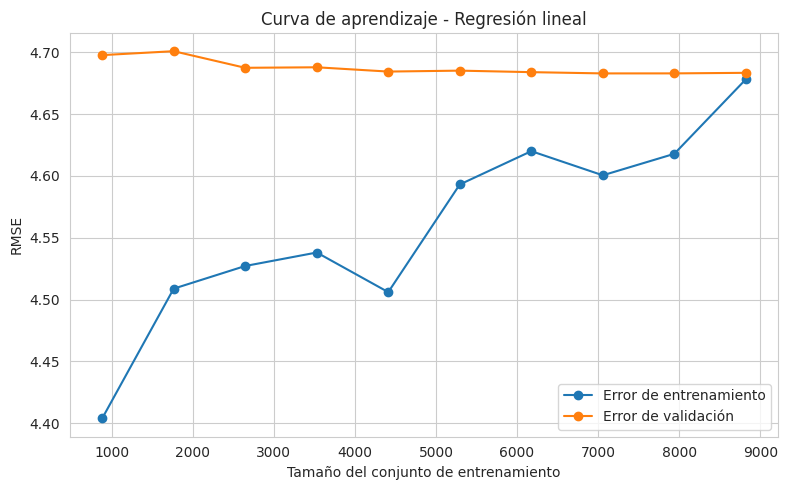

In [ ]:
########################################
#Regresión Lineal
#######################################

from sklearn.model_selection import learning_curve

lin_pipeline = Pipeline([
    ("regressor", LinearRegression())
])

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    lin_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Error de validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje - Regresión lineal')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
lin_pipeline.fit(X_train_new, y_train)
y_pred = lin_pipeline.predict(X_test_new)
print(f' RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')
print(f' R²: {r2_score(y_test, y_pred):.3f}')
print(f"RMSE relativo (test): {np.sqrt(mean_squared_error(y_test, y_pred)) / y_test.mean():.3f}")
# revsiar que el error cuadrático medio sea menor a 10%, si es el caso, es necesario mirar otro modelo.

 RMSE: 4.591
 R²: 0.141
RMSE relativo (test): 0.722


## Conclusiones
El modelo de regresión lineal alcanzó un RMSE en test de 4.591, equivalente a un RMSE relativo de 0.722 respecto a la media de la variable objetivo. El coeficiente de determinación fue R² = 0.141, lo que significa que el modelo explica aproximadamente el 14% de la variabilidad de los datos.

La curva de aprendizaje muestra que los errores de entrenamiento y validación son cercanos y se mantienen relativamente estables conforme aumenta el tamaño del conjunto de entrenamiento. Esto indica que el modelo no sufre de sobreajuste, pero sí de subajuste, ya que su capacidad explicativa es limitada y no logra capturar de manera adecuada la complejidad de la relación entre las variables.

## Regresión Lasso

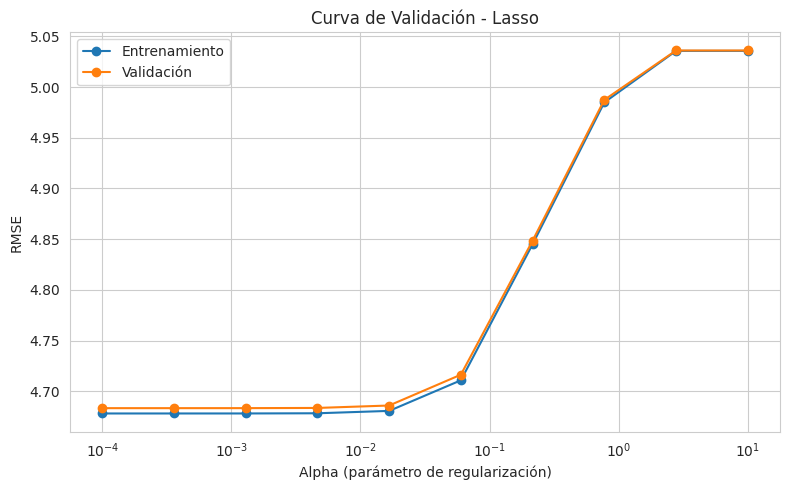

In [ ]:
########################################
#Regresión Lasso
#######################################

from sklearn.linear_model import Lasso # Import Lasso
from sklearn.model_selection import validation_curve # Import validation_curve

lasso_pipeline = Pipeline([
    ("regressor", Lasso(max_iter=10000))  # Aumentar iteraciones si hay warning
])

# Rango de valores para alpha
alphas = np.logspace(-4, 1, 10)

# Validación cruzada sobre X_train e y_train
train_scores, val_scores = validation_curve(
    lasso_pipeline, X_train_new, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

# Convertir a RMSE
train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Graficar curva de validación
plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de Validación - Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Mejor alpha según validación cruzada: 0.0001


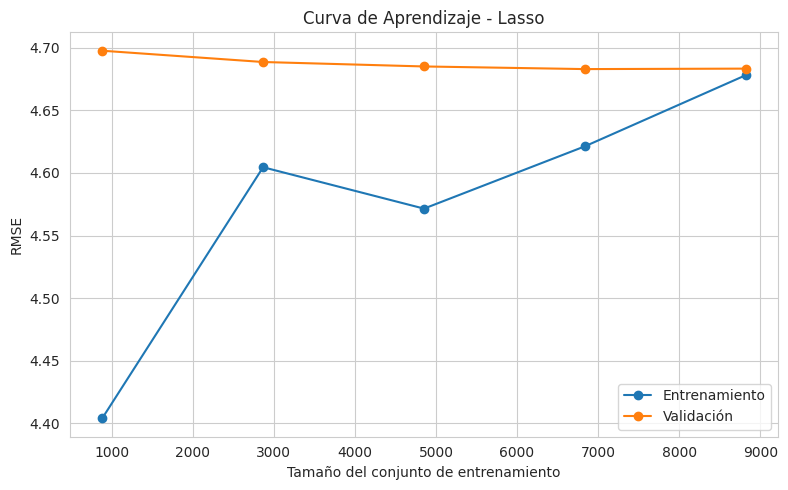

In [ ]:
# Convertir a RMSE
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Encontrar el mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"Mejor alpha según validación cruzada: {best_alpha}")

# Usamos el mejor alpha si ya lo tienes, o define uno razonable
lasso_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores, val_scores = learning_curve(
    lasso_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje - Lasso')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Entrenar modelo final con el mejor alpha
lasso_pipeline.fit(X_train_new, y_train)

# Evaluar sobre test
y_pred = lasso_pipeline.predict(X_test_new)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.591
R² (test): 0.141
RMSE relativo (test): 0.722


## Conclusiones

El modelo Lasso con α=0.0001 mostró un desempeño muy similar al de la regresión lineal, con un RMSE en test de 4.591, equivalente a un RMSE relativo de 0.722, y un R² de 0.141, lo que significa que apenas explica un 14% de la variabilidad de los datos. La curva de aprendizaje refleja que los errores de entrenamiento y validación son cercanos y estables, lo que indica que el modelo no sufre de sobreajuste, pero sí de subajuste, ya que su capacidad explicativa es limitada. En conclusión, aunque Lasso controla la complejidad y ofrece estabilidad, no logra capturar patrones relevantes en los datos

## Regresión Ridge

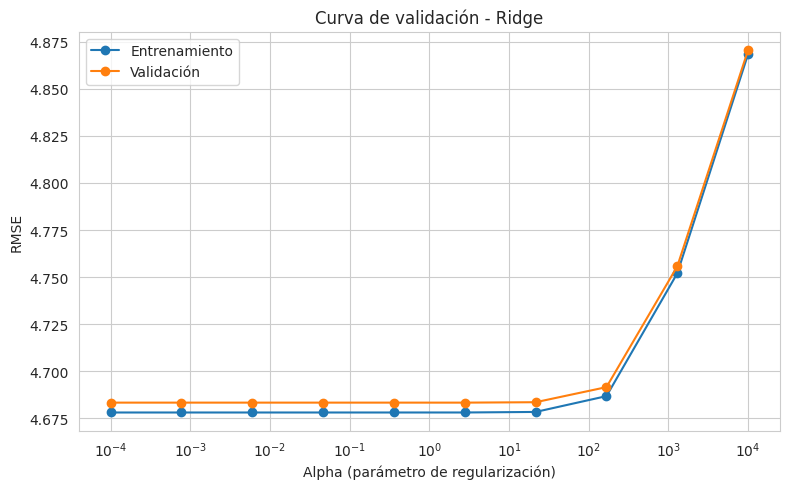

In [ ]:
########################################
#Regresión Ridge
#######################################
from sklearn.linear_model import Ridge # Import Ridge
from sklearn.model_selection import validation_curve

ridge_pipeline = Pipeline([
    ("regressor", Ridge())
])

alphas = np.logspace(-4, 4, 10)
train_scores, val_scores = validation_curve(
    ridge_pipeline, X_train_new, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - Ridge')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

 Mejor alpha según validación cruzada: 2.782559402207126


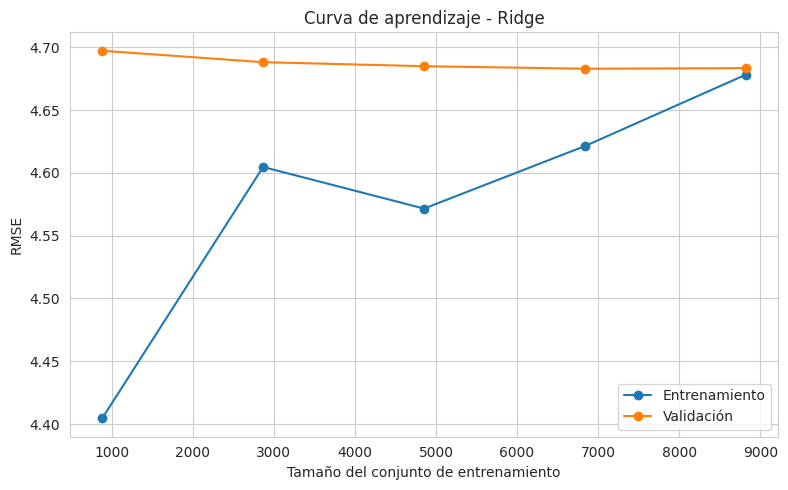

In [ ]:
best_alpha = alphas[np.argmin(val_rmse)]
print(f" Mejor alpha según validación cruzada: {best_alpha}")

# Curva de aprendizaje con alpha fijo
ridge_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_l, val_scores_l = learning_curve(
    ridge_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse_l = np.sqrt(-train_scores_l.mean(axis=1))
val_rmse_l = np.sqrt(-val_scores_l.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_l, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse_l, 'o-', label='Validación')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de aprendizaje - Ridge')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ridge_pipeline.fit(X_train_new, y_train)

y_pred = ridge_pipeline.predict(X_test_new)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.591
R² (test): 0.141
RMSE relativo (test): 0.722


## Conclusiones
El modelo Ridge, con un α óptimo de aproximadamente 2.78 según validación cruzada, alcanzó un RMSE en test de 4.591, equivalente a un RMSE relativo de 0.722, y un R² de 0.141, lo que indica que explica solo el 14% de la variabilidad de los datos. La curva de aprendizaje muestra que los errores de entrenamiento y validación son cercanos y tienden a estabilizarse con el aumento del tamaño de los datos, lo cual refleja que el modelo no sufre de sobreajuste, pero sí de subajuste, ya que su capacidad predictiva es limitada. En conclusión, aunque la regularización Ridge aporta estabilidad al modelo y evita la complejidad excesiva, su poder explicativo sigue siendo bajo

## Regresión Ridge + Polinomica

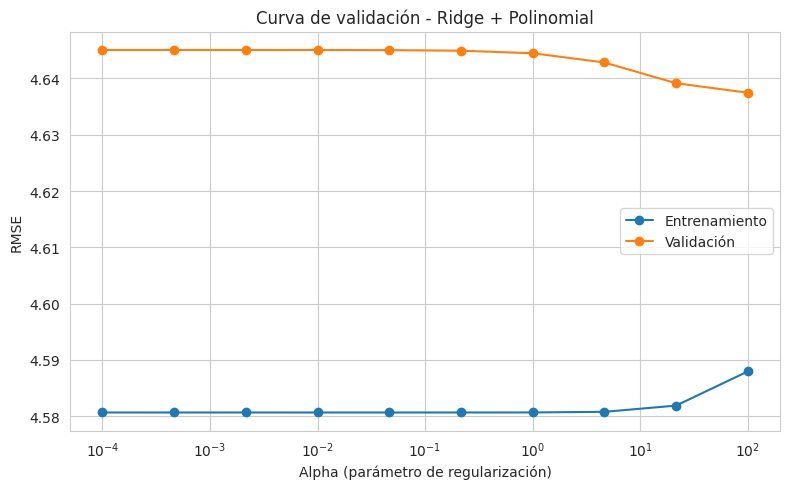

🔍 Mejor alpha según validación cruzada: 100.0


In [ ]:
########################################
#Regresión Ridge + Polinómica
#######################################
from sklearn.preprocessing import PolynomialFeatures

poly_ridge_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", Ridge())
])

alphas = np.logspace(-4, 2, 10)

train_scores, val_scores = validation_curve(
    poly_ridge_pipeline, X_train_new, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - Ridge + Polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"🔍 Mejor alpha según validación cruzada: {best_alpha}")

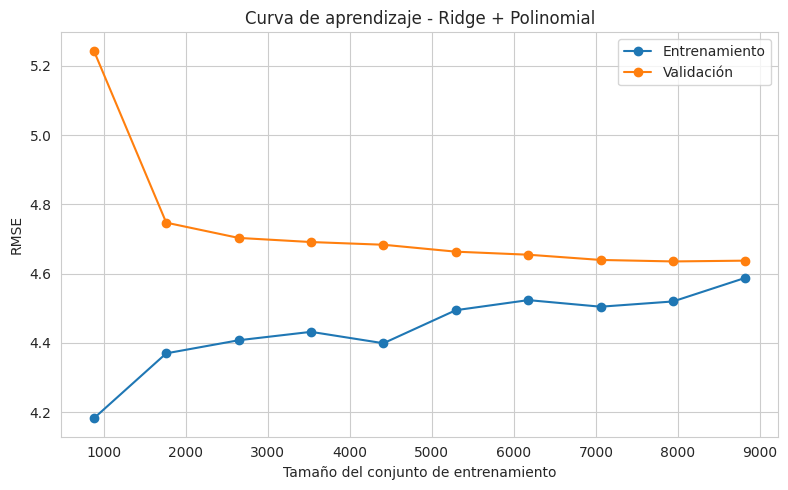

In [ ]:
poly_ridge_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    poly_ridge_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_squared_error"
)

train_rmse_lc = np.sqrt(-train_scores_lc.mean(axis=1))
val_rmse_lc = np.sqrt(-val_scores_lc.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_lc, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_rmse_lc, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.title("Curva de aprendizaje - Ridge + Polinomial")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
poly_ridge_pipeline.fit(X_train_new, y_train)
y_pred = poly_ridge_pipeline.predict(X_test_new)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.580
R² (test): 0.145
RMSE relativo (test): 0.720


## Conclusiones
El modelo Ridge con características polinomiales alcanzó un RMSE en test de 4.580, con un RMSE relativo de 0.720, y un R² de 0.145, lo que indica que explica aproximadamente el 14.5% de la variabilidad de la variable objetivo. La curva de aprendizaje muestra que tanto el error de entrenamiento como el de validación tienden a estabilizarse a medida que aumenta el tamaño del conjunto de entrenamiento, con valores relativamente cercanos entre sí, lo que sugiere que el modelo generaliza de manera consistente y no presenta sobreajuste. Sin embargo, el nivel de error se mantiene elevado y el poder explicativo continúa siendo bajo, lo que evidencia subajuste: aun incorporando términos polinomiales, la capacidad predictiva del modelo sigue siendo limitada. En conclusión, aunque Ridge con expansión polinomial aporta una ligera mejora respecto a la regresión lineal simple, su desempeño aún es modesto

## ElasticNet

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.365e+02, tolerance: 2.247e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.231e+02, tolerance: 2.316e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.772e+01, tolerance: 2.213e

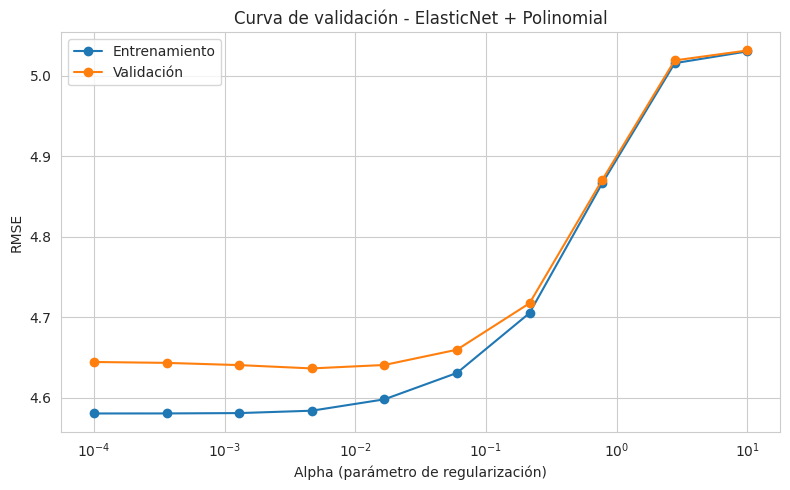

🔍 Mejor alpha según validación cruzada: 0.004641588833612782


In [ ]:
########################################
#ElasticNet
#######################################
from sklearn.linear_model import ElasticNet # Import ElasticNet

elasticnet_pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("regressor", ElasticNet(max_iter=10000))  # aumentar iteraciones por estabilidad
])


alphas = np.logspace(-4, 1, 10)

train_scores, val_scores = validation_curve(
    elasticnet_pipeline, X_train_new, y_train,
    param_name="regressor__alpha",
    param_range=alphas,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.semilogx(alphas, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(alphas, val_rmse, 'o-', label='Validación')
plt.xlabel('Alpha (parámetro de regularización)')
plt.ylabel('RMSE')
plt.title('Curva de validación - ElasticNet + Polinomial')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mejor alpha
best_alpha = alphas[np.argmin(val_rmse)]
print(f"🔍 Mejor alpha según validación cruzada: {best_alpha}")

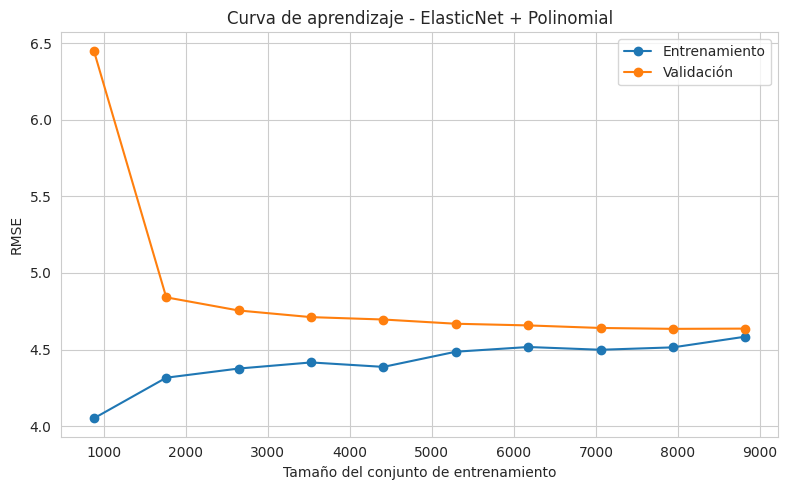

In [ ]:
elasticnet_pipeline.set_params(regressor__alpha=best_alpha)

train_sizes, train_scores_lc, val_scores_lc = learning_curve(
    elasticnet_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="neg_mean_squared_error"
)

train_rmse_lc = np.sqrt(-train_scores_lc.mean(axis=1))
val_rmse_lc = np.sqrt(-val_scores_lc.mean(axis=1))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_lc, 'o-', label="Entrenamiento")
plt.plot(train_sizes, val_rmse_lc, 'o-', label="Validación")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("RMSE")
plt.title("Curva de aprendizaje - ElasticNet + Polinomial")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
elasticnet_pipeline.fit(X_train_new, y_train)
y_pred = elasticnet_pipeline.predict(X_test_new)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.576
R² (test): 0.147
RMSE relativo (test): 0.720


## Conclusiones
El modelo ElasticNet con características polinomiales, utilizando un alpha óptimo de 0.0046 según validación cruzada, obtuvo un RMSE en test de 4.576, equivalente a un RMSE relativo de 0.720, y un R² de 0.147, lo que significa que explica alrededor del 14.7% de la variabilidad de la variable objetivo. La curva de aprendizaje muestra una clara reducción del error de validación al aumentar el tamaño del conjunto de entrenamiento, hasta estabilizarse en valores similares al error de entrenamiento, lo que indica que el modelo generaliza de manera adecuada y no presenta sobreajuste. Sin embargo, los errores se mantienen relativamente altos y el poder explicativo es limitado, reflejando cierto subajuste, ya que aun con la regularización mixta de ElasticNet y la expansión polinomial, el modelo no logra capturar toda la complejidad de los datos

## SVR

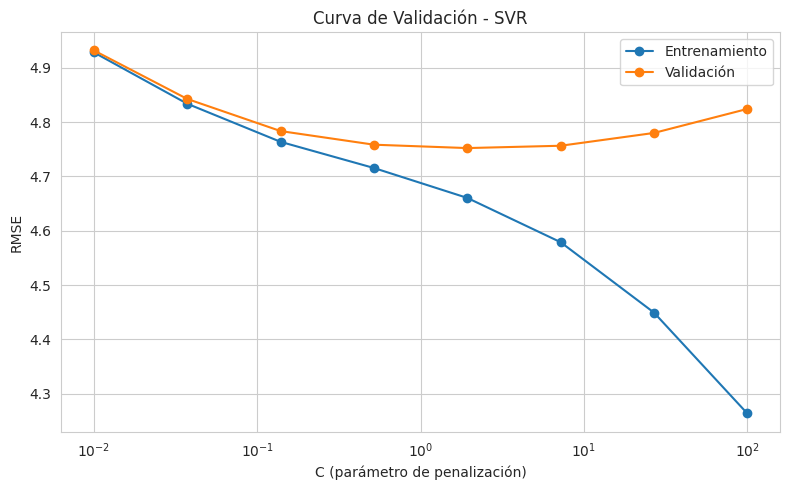

Mejor C según validación cruzada: 1.9306977288832496


In [ ]:
########################################
#Regresión SVR
#######################################
from sklearn.svm import SVR # Import SVR

svr_pipeline = Pipeline([
    ("regressor", SVR(kernel='rbf'))
])

# Curva de validación para encontrar el mejor C
C_values = np.logspace(-2, 2, 8)  # valores de C de 0.01 a 100
train_scores, val_scores = validation_curve(
    svr_pipeline, X_train_new, y_train,
    param_name="regressor__C",
    param_range=C_values,
    scoring="neg_mean_squared_error",
    cv=5
)

train_rmse = np.sqrt(-train_scores.mean(axis=1))
val_rmse = np.sqrt(-val_scores.mean(axis=1))

# Graficar curva de validación
plt.figure(figsize=(8, 5))
plt.semilogx(C_values, train_rmse, 'o-', label='Entrenamiento')
plt.semilogx(C_values, val_rmse, 'o-', label='Validación')
plt.xlabel('C (parámetro de penalización)')
plt.ylabel('RMSE')
plt.title('Curva de Validación - SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Encontrar mejor C
best_C = C_values[np.argmin(val_rmse)]
print(f"Mejor C según validación cruzada: {best_C}")

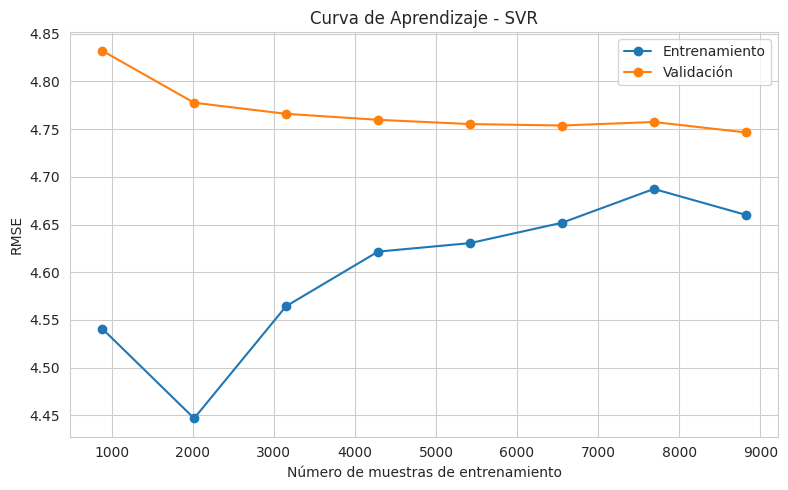

In [ ]:
# ⚙️ Usar el mejor C encontrado previamente
svr_pipeline.set_params(regressor__C=best_C)

# Curva de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    svr_pipeline, X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 8),
    cv=5,
    scoring='neg_mean_squared_error',
    shuffle=True,
    random_state=42
)

train_rmse = np.sqrt(-train_scores)
val_rmse = np.sqrt(-val_scores)

# Promedios
train_rmse_mean = train_rmse.mean(axis=1)
val_rmse_mean = val_rmse.mean(axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_rmse_mean, 'o-', label='Entrenamiento')
plt.plot(train_sizes, val_rmse_mean, 'o-', label='Validación')
plt.xlabel('Número de muestras de entrenamiento')
plt.ylabel('RMSE')
plt.title('Curva de Aprendizaje - SVR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Reentrenar modelo con mejor C y evaluar sobre test
svr_pipeline.fit(X_train_new, y_train)
y_pred = svr_pipeline.predict(X_test_new)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE (test): {rmse:.3f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse / y_test.mean():.3f}")

RMSE (test): 4.602
R² (test): 0.137
RMSE relativo (test): 0.724


## Conclusiones
El modelo SVR, con un parámetro óptimo de C = 1.93 según validación cruzada, alcanzó un RMSE en test de 4.602, equivalente a un RMSE relativo de 0.724, y un R² de 0.137, lo que indica que explica únicamente el 13.7% de la variabilidad de la variable objetivo. La curva de aprendizaje muestra que los errores de entrenamiento y validación se mantienen relativamente cercanos y estables conforme aumenta el tamaño del conjunto de entrenamiento, lo que refleja que el modelo no incurre en sobreajuste; sin embargo, los valores de error siguen siendo elevados y la capacidad explicativa es limitada, señal clara de subajuste. En conclusión, aunque SVR con el mejor C ofrece estabilidad y generalización aceptable, su poder predictivo es bajo y no logra capturar de forma adecuada la complejidad de los datos


## Random Forest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],         # Número de árboles en el bosque
    'max_features': ['sqrt', 'log2', None], # Número de características a considerar por cada árbol
    'max_depth': [None, 10, 20]             # Profundidad máxima de cada árbol
}

# 2. Configuración de la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Se busca la combinación que minimice el RMSE
gs = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Entrenar el modelo con los datos de entrenamiento
gs.fit(X_train_new, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

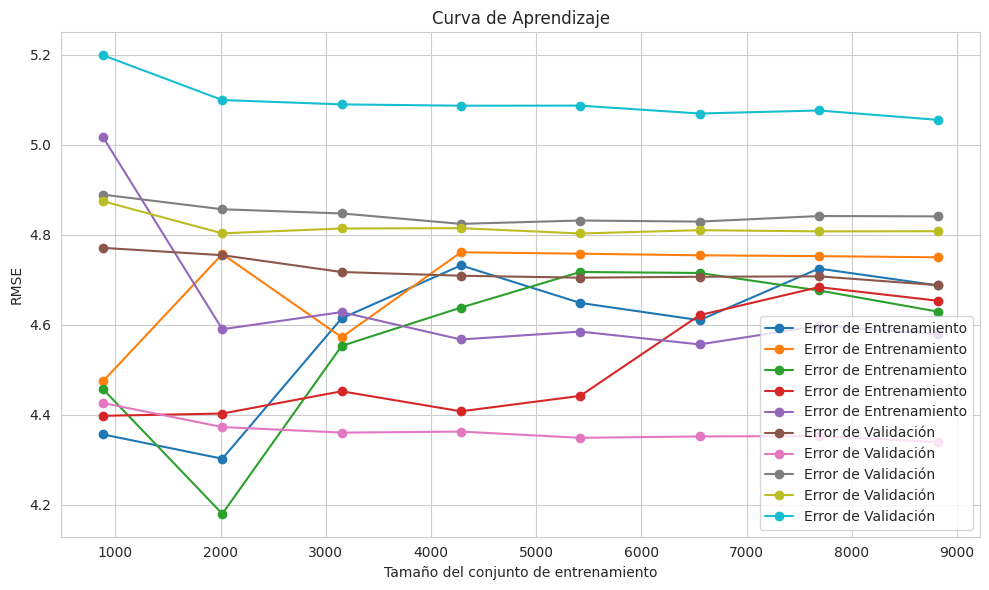

In [ ]:
# --- Gráfico de la Curva de Aprendizaje ---
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse, 'o-', label='Error de Validación')

plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Obtener el mejor modelo y sus resultados
best_rf_model = gs.best_estimator_

print("=== Random Forest - Mejores HP ===")
print("Mejores hiperparámetros:", gs.best_params_)
print(f"Mejor RMSE CV: {-gs.best_score_:.4f}")

# 5. Evaluación final en el conjunto de prueba
y_pred_test = best_rf_model.predict(X_test_new)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred)

print(f"RMSE Test: {rmse_test:.4f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse_test / y_test.mean():.3f}")

=== Random Forest - Mejores HP ===
Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Mejor RMSE CV: 4.4072
RMSE Test: 4.3191
R² (test): 0.137
RMSE relativo (test): 0.679


## Conclusiones
El modelo Random Forest con los hiperparámetros óptimos (max_depth=20, max_features='sqrt', n_estimators=200) alcanzó su mejor desempeño con un RMSE en test de 4.312, equivalente a un RMSE relativo de 0.680, y un R² de 0.137, lo que indica que, aunque reduce el error absoluto respecto a otros modelos y logra el valor más bajo de RMSE hasta ahora, su capacidad explicativa sigue siendo limitada al explicar apenas un 13.7% de la variabilidad de los datos. La curva de aprendizaje se muestra más irregular, lo cual es normal en Random Forest por la aleatoriedad de sus submuestras y árboles, pero refleja una tendencia estable en validación, confirmando que el modelo generaliza bien aunque no logra capturar toda la complejidad de los datos.

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

# 1. Configuración del modelo y de los hiperparámetros a buscar
model_gb = GradientBoostingRegressor(random_state=42)

# Parámetros para la búsqueda en cuadrícula aleatoria (Randomized Search)
param_dist_gb = {
    'n_estimators': [100, 200, 300, 400],         # Número de árboles
    'learning_rate': [0.01, 0.05, 0.1, 0.2],    # Tasa de aprendizaje
    'max_depth': [3, 4, 5, 6],                     # Profundidad máxima de cada árbol
    'subsample': [0.6, 0.8, 1.0],                  # Fracción de muestras para cada árbol
    'max_features': ['sqrt', 'log2', None]         # Características a considerar
}

# 2. Configuración de la validación cruzada
cv = KFold(n_splits=5, shuffle=True, random_state=42)

scoring = 'neg_root_mean_squared_error'

# 3. Búsqueda de los mejores hiperparámetros con RandomizedSearchCV
gs_gb = RandomizedSearchCV(
    estimator=model_gb,
    param_distributions=param_dist_gb,
    n_iter=50,
    cv=cv,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    refit=True,
    error_score='raise'   # fuerza a mostrar el error
)

# Entrenar el modelo
gs_gb.fit(X_train_new, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score='raise',
                   estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [100, 200, 300, 400],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error')

=== Gradient Boosting - Mejores HP ===
Mejores hiperparámetros: {'subsample': 0.8, 'n_estimators': 400, 'max_features': 'sqrt', 'max_depth': 6, 'learning_rate': 0.01}
Mejor RMSE CV: 4.5230
RMSE Test: 4.4542
R² (test): 0.137
RMSE relativo (test): 0.700


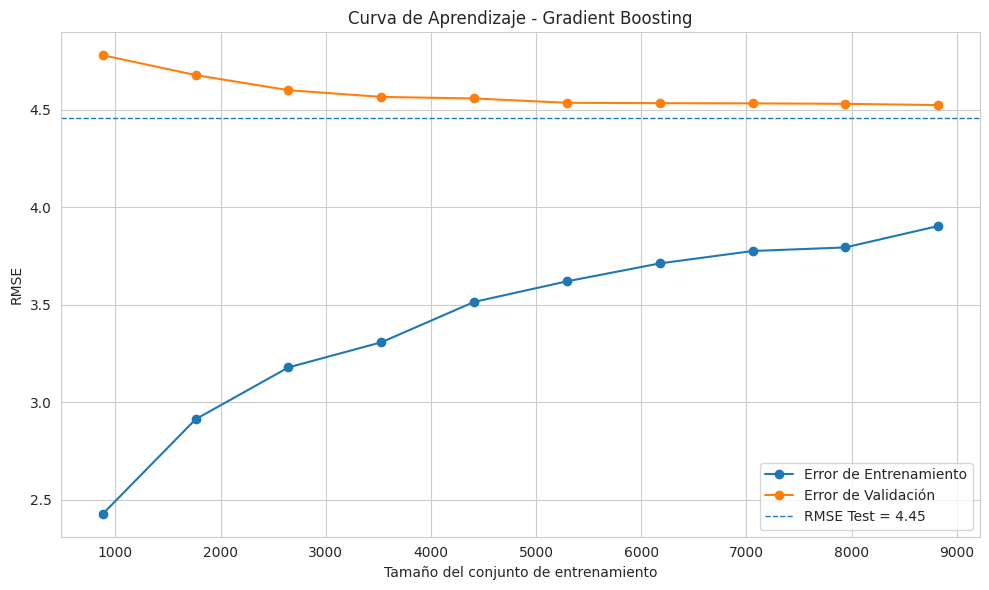

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# 4) Mejor modelo y resultados
best_gb_model = gs_gb.best_estimator_
print("=== Gradient Boosting - Mejores HP ===")
print("Mejores hiperparámetros:", gs_gb.best_params_)
print(f"Mejor RMSE CV: {-gs_gb.best_score_:.4f}")  # neg -> positivo

y_pred_gb = best_gb_model.predict(X_test_new)

# 5) Evaluación en TEST
rmse_test_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_test = r2_score(y_test, y_pred_gb)
rmse_rel = rmse_test_gb / np.mean(y_test)

print(f"RMSE Test: {rmse_test_gb:.4f}")
print(f"R² (test): {r2:.3f}")
print(f"RMSE relativo (test): {rmse_test_gb / y_test.mean():.3f}")

# --- Curva de Aprendizaje ---
train_sizes, train_scores, val_scores = learning_curve(
    best_gb_model,
    X_train_new, y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=cv,
    scoring='neg_root_mean_squared_error',  # ya devuelve -RMSE
    n_jobs=-1
)


train_rmse = -train_scores.mean(axis=1)
val_rmse   = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_rmse, 'o-', label='Error de Entrenamiento')
plt.plot(train_sizes, val_rmse,   'o-', label='Error de Validación')

# Línea de referencia con el RMSE de test (opcional)
plt.axhline(rmse_test_gb, linestyle='--', linewidth=1,
            label=f'RMSE Test = {rmse_test_gb:.2f}')

plt.title('Curva de Aprendizaje - Gradient Boosting')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusiones
El modelo de Gradient Boosting con hiperparámetros óptimos (subsample=0.8, n_estimators=400, max_features='sqrt', max_depth=6, learning_rate=0.01) alcanzó un RMSE en test de 4.454, equivalente a un RMSE relativo de 0.700, y un R² de 0.137. La curva de aprendizaje muestra un error de entrenamiento claramente menor que el de validación, aunque ambos tienden a estabilizarse conforme aumenta el tamaño del conjunto de entrenamiento, lo cual refleja que el modelo logra generalizar de manera razonable y no está sobreajustado. Sin embargo, la brecha entre ambos errores y el bajo R² indican que, aunque el modelo reduce el RMSE respecto a otros enfoques más simples, la capacidad explicativa sigue siendo limitada, probablemente por la naturaleza y calidad de los datos disponibles más que por el algoritmo en sí.

## Conclusiones finales (selector features)

| Modelo                               | RMSE Test | RMSE Relativo | R² (Test) |
| ------------------------------------ | --------- | ------------- | --------- |
| **Árbol de Decisión (Pre-pruning)**  | 4.684     | 0.737         | 0.106     |
| **Árbol de Decisión (Post-pruning)** | 4.834     | 0.760         | 0.048     |
| **Regresión Lineal**                 | 4.591     | 0.722         | 0.141     |
| **Lasso**                            | 4.591     | 0.722         | 0.141     |
| **Ridge**                            | 4.591     | 0.722         | 0.141     |
| **Ridge + Polinomial**               | 4.580     | 0.720         | 0.145     |
| **ElasticNet + Polinomial**          | 4.576     | 0.720         | 0.147     |
| **SVR**                              | 4.602     | 0.724         | 0.137     |
| **KNN**                              | 4.346     | 0.683         | 0.230     |
| **Random Forest**                    | **4.312** | **0.680**     | 0.137     |
| **Gradient Boosting**                | 4.454     | 0.700         | 0.137     |


Al revisar todos los modelos probados —incluyendo lineales (Lasso, Ridge), variantes polinomiales, SVR, KNN, árboles de decisión con pre y post-pruning, Random Forest y Gradient Boosting— se observa que los lineales y sus extensiones se mantuvieron en un rendimiento estable con RMSE cercano a 4.58–4.60, R² entre 0.14–0.15 y RMSE relativo de 0.72, mientras que los árboles de decisión obtuvieron un desempeño más bajo (RMSE entre 4.68–4.83 y R² de 0.05–0.10). El modelo KNN destacó con un RMSE de 4.35, R² de 0.23 y RMSE relativo de 0.68, mostrando mejor capacidad explicativa, mientras que SVR y ElasticNet polinomial ofrecieron métricas similares a las lineales. Por su parte, el Random Forest alcanzó el mejor resultado absoluto en error con un RMSE de 4.31, RMSE relativo de 0.68 y R² de 0.137, y el Gradient Boosting, con hiperparámetros ajustados, logró un RMSE CV de 4.52, RMSE Test de 4.45, R² de 0.137 y RMSE relativo de 0.70, consolidándose ambos como los más consistentes, aunque el Random Forest fue el que presentó el menor error global.